Grupo Trabajo 2
Integrantes: Laura Martín, Daniel Quesada, Desiderio
Fecha Entrega: 29 Abril 2023

# BANKING: ESTUDIO DE LA SUSCRIPCIÓN A UN DEPOSITO A PLAZO

## OVERVIEW

### Contexto
Los depósitos a plazo son una fuente importante de ingresos para un banco. Un depósito a plazo es una inversión en efectivo mantenida en una institución financiera. Su dinero se invierte por una tasa de interés acordada durante un período fijo de tiempo o plazo. El banco tiene varios planes de divulgación para vender depósitos a plazo a sus clientes, como marketing por correo electrónico, anuncios, marketing telefónico y marketing digital.

Las campañas de marketing telefónico siguen siendo una de las formas más efectivas de llegar a las personas. Sin embargo, requieren una gran inversión, ya que se contratan grandes centros de llamadas para ejecutar estas campañas. Por lo tanto, es crucial identificar a los clientes con más probabilidades de convertir de antemano para que puedan ser dirigidos específicamente a través de una llamada.

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de la clasificación es predecir si el cliente se suscribirá a un depósito a plazo (variable y)

### Datos
Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para determinar (depósito bancario) sería suscrito por el cliente o no.
Disponemos de dos conjuntos de datos:

train.csv: 45.211 filas y 17 columnas ordenadas por fecha (de mayo de 2008 a noviembre de 2010)
test.csv: 4521 filas y 17 columnas con el 10% de los ejemplos (4521), seleccionados aleatoriamente de train.csv

#### Dataset Bank client data: Variables

1 - age (numérica)

2 - job : tipo de trabajo (categórica)
Valores: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services"

*Traducción en Español: "admin.","desconocido","desempleado","gestión","empleada doméstica","empresario","estudiante",  "obrero","autónomo","jubilado","técnico","servicios"*

3 - marital :  estado civil (categórica)
Valores: "married","divorced","single"
*Traducción: "casado", "divorciado", "soltero"*

*Nota: "divorciado" significa divorciado o viudo*

4 - education (categórica)
Valores: "unknown","secondary","primary","tertiary"
*Traducción: "desconocido", "secundario", "primario", "terciario"*

5 - default: Incumplimiento, ¿tiene mora de cédito? (categórica binaria)
Valores: "yes", "no"

6 - balance: Saldo medio anual, en euros (numérica)

7 - housing: Vivienda, ¿tiene algún prestamo hipotecario? (categórica binaria)
Valores: "yes", "no"

8 - loan: prestamo, ¿tiene algún préstamo personal? (categórica binaria)
Valores: "yes", "no"

**Relacionadas con el último contacto de la campaña actual:**

9 - contact: tipo de contacto en la comunicación (categórica)
Valores:"unknown","telephone","cellular"
*Traducción: "desconocido", "telefónica por cable" (fijo),"telefónica sin cable" (movil)*

10 - day: último contacto, día del mes (numérica)

11 - month: último mes de contacto (categórica)
Valores: "jan", "feb", "mar", …, "nov", "dec"

12 - duration: duración del último contacto, en segundos (numérica)

13 - campaign: número de contactos realizados durante esta campaña y para este cliente (numérica)
*Nota: Incluye el último contacto*

**Otras variables: relacionadas con campañas previas**

14 - pdays: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (numérica)
*Nota: -1 significa que el cliente no fue contactado previamente*

15 - previous: número de contactos totales realizados antes de esta campaña y para este cliente (numérica)

16 - poutcome: resultado de la campaña de marketing anterior (categórica)
Valores: "unknown","other","failure","success"
*Traducción: "desconocido", "otro", "fracaso", "éxito"*

**Variable respuesta:**

17 - subscribed: ¿El cliente ha suscrito un depósito a plazo? (categórica binaria)
Valores: "yes","no"



*NOTA: Este conjunto de datos está disponible públicamente para la investigación. Se ha recogido del aprendizaje automático de la UCI con muestreo aleatorio y algunas columnas adicionales.*


## EDA

### Estudio inicial del dataset

Importación de librerías que vamos a usar en el proyecto

In [241]:
import warnings
#TRATAMIENTO DE DATOS
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
#MODELOS
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#REDUCC DIMS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.metrics import euclidean_distances
#GRAFICOS
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
warnings.filterwarnings('ignore')

**Carga de los datos**

In [3]:
train = pd.read_csv('./Data/train.csv', sep=';')
test = pd.read_csv("./Data/test.csv", sep=';')

In [4]:
train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
test.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Renombramos la columna "y". Es la variable respuesta, subscribed, así que renombramos esta columna:

In [6]:
train = train.rename(columns={"y": "subscribed"})
test = test.rename(columns={"y": "subscribed"})

In [7]:
train.shape, test.shape

((45211, 17), (4521, 17))

Tenemos 45211 registros en train y 4521 en test y 17 variables

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   day         45211 non-null  int64 
 10  month       45211 non-null  object
 11  duration    45211 non-null  int64 
 12  campaign    45211 non-null  int64 
 13  pdays       45211 non-null  int64 
 14  previous    45211 non-null  int64 
 15  poutcome    45211 non-null  object
 16  subscribed  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   int64 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   int64 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   contact     4521 non-null   object
 9   day         4521 non-null   int64 
 10  month       4521 non-null   object
 11  duration    4521 non-null   int64 
 12  campaign    4521 non-null   int64 
 13  pdays       4521 non-null   int64 
 14  previous    4521 non-null   int64 
 15  poutcome    4521 non-null   object
 16  subscribed  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
train.isna().sum()
test.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

No hay datos NaN en los datasets

*NOTA: a partir de este punto del conjunto de datos test nos olvidamos hasta el final del proyecto, que lo usaremos para probar los modelos*

In [11]:
train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


- La edad mínima para participar en el estudio es 18 años. Aproximadamente, el 50% de los clientes tiene 40 años o más y sólo un 25% supera los 48 años.

- El balance anual medio es 1362€, pero el mediano es 448, por ello, deducimos que hay pocos clientes con balances muy elevados que hacen que suba la media. Esta variable no tendrá una distribución normal y además tiene un desviación estándar, muy grande, valores muy dispersos.

- Más de la mitad de los clientes son gente casada con hipoteca, pero sin préstamo personal.

- En cuanto a la campaña realizada, la mayoría con contactados por cellular (movil), entorno al día 15 y ha recibido 2 impactos en esta campaña.

- De campañas previas en general tenemos poca información, ya que parece que en general estos clientes no han recibido campañas previamente a esta.

Nos planteamos quitar las variables que dan información sobre campñas previas (pdays, previous y poutcome).
Como sabemos que pdays toma valor -1 cuando no se ha realizado una campaña previa a la actual (por definición de las variables del dataset)
vamos a ver si las otras dos variables, previous y poutcome toman valores por defecto cuando no hay campaña, porque entonces serían variables útiles.

In [12]:
train[train.pdays==-1].groupby('previous').poutcome.count()

previous
0    36954
Name: poutcome, dtype: int64

In [13]:
train[train.pdays!=-1].groupby('previous').poutcome.count()

previous
1      2772
2      2106
3      1142
4       714
5       459
6       277
7       205
8       129
9        92
10       67
11       65
12       44
13       38
14       19
15       20
16       13
17       15
18        6
19       11
20        8
21        4
22        6
23        8
24        5
25        4
26        2
27        5
28        2
29        4
30        3
32        1
35        1
37        2
38        2
40        1
41        1
51        1
55        1
58        1
275       1
Name: poutcome, dtype: int64

In [14]:
train[train.pdays==-1].groupby('poutcome').poutcome.count()

poutcome
unknown    36954
Name: poutcome, dtype: int64

In [15]:
train[train.pdays!=-1].groupby('poutcome').poutcome.count()

poutcome
failure    4901
other      1840
success    1511
unknown       5
Name: poutcome, dtype: int64

Viendo los resultados, parece que las variables podrían usarse, ya que no son valores desconocidos. Sino que implican que no se ha recibido campaña. Vamos a tratar poutcome:
 vamos a transformar los valores desconocidos cuando hay campaña en "other" por ser la categoría que más se ajusta al no saber el resultado y ser una categoría abierta y en el caso de que no haya campaña pondremos "no contact"

Hay clientes con saldos anuales negativos. Estudiamos su perfil:

In [16]:
train[train.balance<0].describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,3766.000000,3766,3766,3766,3766,3766.000000,3766,3766,3766,3766.000000,3766,3766.000000,3766.000000,3766.000000,3766.000000,3766,3766
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,1110,2202,2311,3326,NaN,2738,2556,2163,NaN,1664,NaN,NaN,NaN,NaN,3278,3556
mean,39.480351,NaN,NaN,NaN,NaN,-317.677642,NaN,NaN,NaN,16.439724,NaN,252.096389,2.926713,35.314126,0.406798,NaN,NaN
std,9.068517,NaN,NaN,NaN,NaN,368.994983,NaN,NaN,NaN,8.578670,NaN,250.280003,3.474046,99.970675,1.609466,NaN,NaN
min,20.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,-422.000000,NaN,NaN,NaN,9.000000,NaN,105.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,-230.000000,NaN,NaN,NaN,16.000000,NaN,176.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,46.000000,NaN,NaN,NaN,NaN,-93.000000,NaN,NaN,NaN,24.000000,NaN,305.000000,3.000000,-1.000000,0.000000,NaN,NaN


Vemos que hay clientes con balance de saldo anual negativos, en concreto, 3766 clientes. Estos clientes con saldos negativos se caracterizan por tener una edad media que ronda los 40 años, con hipoteca, casados y de clase obrera.
Entorno al 75% de estos clientes tiene saldo negativo inferior a 400€. De estos clientes sólo un 9% suscribe el crédito, la proporción es menor que si tienen mayor balance (un balance anual superior a 500€ arroja un 16% de aceptación del crédito).

### Codificación de variables

Esta parte la aplicaremos a ambos conjuntos de datos (train y test), pero a test no lo haremos hasta que no se haya acabado de entrenar los modelos para no sobre ajustar y poder evaluar correctamente los modelos.

In [17]:
ohe = OneHotEncoder(sparse = False)

In [18]:
def codificar(df):
    #Variable Jo
    df_encoded = pd.concat((df, pd.DataFrame(ohe.fit_transform(df["job"].to_frame()),columns = "job_" +
    np.sort(df["job"].unique()))),axis = 1)
    df_encoded.drop(columns = ["job"],inplace = True)

    #Variable poutcome: Empezamos corrigiendo la variable poutcome. Lo hacemos tanto en train para ver el análisis de variables posteriorcorrectamente como en df para tenerlo en el dataset que vamos a generar codificado para entrenar los modelos
    train.loc[(train.pdays != -1) & (train.poutcome == "unknown"),"poutcome"] = 'other'
    df.loc[(df.pdays != -1) & (df.poutcome == "unknown"),"poutcome"] = 'other'
    train.loc[(train.pdays == -1) & (train.poutcome == "unknown"),"poutcome"] = 'no contact'
    df.loc[(df.pdays == -1) & (df.poutcome == "unknown"),"poutcome"] = 'no contact'

    df_encoded = pd.concat((df_encoded , pd.DataFrame(ohe.fit_transform(df_encoded["poutcome"].to_frame()),columns = "poutcome_" + np.sort(df_encoded["poutcome"].unique()))),axis = 1)
    df_encoded .drop(columns = ["poutcome"],inplace = True)

    #Variable Marital (estado civil)
    df_encoded = pd.concat((df_encoded , pd.DataFrame(ohe.fit_transform(df_encoded["marital"].to_frame()),columns = "marital_" + np.sort(df_encoded["marital"].unique()))),axis = 1)
    df_encoded .drop(columns = ["marital"],inplace = True)

    #Variable Education
    df_encoded.loc[(df_encoded.education == "tertiary"),"education"] = 3
    df_encoded.loc[(df_encoded.education == "secondary") ,"education"] = 2
    df_encoded.loc[(df_encoded.education == "primary"),"education"] = 1
    df_encoded.loc[(df_encoded.education == "unknown"),"education"] = 0

    #Variables Categóricas dicotómicas
    df_encoded.loc[(df_encoded.default == "yes"),"default"] = 1
    df_encoded.loc[(df_encoded.default == "no") ,"default"] = 0
    df_encoded.loc[(df_encoded.housing == "yes"),"housing"] = 1
    df_encoded.loc[(df_encoded.housing == "no") ,"housing"] = 0
    df_encoded.loc[(df_encoded.loan == "yes"),"loan"] = 1
    df_encoded.loc[(df_encoded.loan == "no") ,"loan"] = 0
    #Consideramos que telephone y cellular son lo mismo porque además producen la misma respuesta sobre la target
    df_encoded.loc[(df_encoded.contact == "telephone"),"contact"] = 1
    df_encoded.loc[(df_encoded.contact == "cellular") ,"contact"] = 1
    df_encoded.loc[(df_encoded.contact == "unknown") ,"contact"] = 0

    df_encoded.loc[(df_encoded.subscribed == "yes"),"subscribed"] = 1
    df_encoded.loc[(df_encoded.subscribed == "no") ,"subscribed"] = 0

    #Convierto variables tipo object a int, para facilitar su uso en los modelos
    df_encoded.education = df_encoded.education.astype(int)
    df_encoded.default = df_encoded.default.astype(int)
    df_encoded.housing = df_encoded.housing.astype(int)
    df_encoded.loan = df_encoded.loan.astype(int)
    df_encoded.contact = df_encoded.contact.astype(int)
    df_encoded.subscribed = df_encoded.subscribed.astype(int)

    #Viendo el análisis posterior (age como variable numérica) se decide tramificar la variable edad:
    df_encoded.loc[(df_encoded.age > 55),"age_group"] = "mayores de 55 años"
    df_encoded.loc[(df_encoded.age >= 18) & (df_encoded.age <= 35),"age_group"] = "entre 18 y 35 años"
    df_encoded.loc[(df_encoded.age > 35) & (df_encoded.age <= 55),"age_group"] = "entre 36 y 55 años"

    df_encoded = pd.concat((df_encoded , pd.DataFrame(ohe.fit_transform(df_encoded["age_group"].to_frame()),columns = "" +                       np.sort(df_encoded["age_group"].unique()))),axis = 1)
    df_encoded.drop(columns = ["age_group"],inplace = True)

    #Variable month
    df_encoded.loc[(df_encoded.month == "jan") ,"month_num"] = 1
    df_encoded.loc[(df_encoded.month == "feb"),"month_num"] = 2
    df_encoded.loc[(df_encoded.month == "mar"),"month_num"] = 3
    df_encoded.loc[(df_encoded.month == "apr"),"month_num"] = 4
    df_encoded.loc[(df_encoded.month == "may"),"month_num"] = 5
    df_encoded.loc[(df_encoded.month == "jun"),"month_num"] = 6
    df_encoded.loc[(df_encoded.month == "jul"),"month_num"] = 7
    df_encoded.loc[(df_encoded.month == "aug"),"month_num"] = 8
    df_encoded.loc[(df_encoded.month == "sep"),"month_num"] = 9
    df_encoded.loc[(df_encoded.month == "oct"),"month_num"] = 10
    df_encoded.loc[(df_encoded.month == "nov"),"month_num"] = 11
    df_encoded.loc[(df_encoded.month == "dec"),"month_num"] = 12
    df_encoded.drop(columns = ["month"],inplace = True)
    df_encoded.drop(columns = ["age"],inplace = True)
    return df_encoded

In [19]:
#Me creo dataset de train codificado para entrenar con él
df_encoded = codificar(train)

In [20]:
df_encoded.head(3)

,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,...,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single,entre 18 y 35 años,entre 36 y 55 años,mayores de 55 años,month_num
0,3,0,2143,1,0,0,5,261,1,-1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0
1,2,0,29,1,0,0,5,151,1,-1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0
2,2,0,2,1,1,0,5,76,1,-1,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0


In [21]:
#Tramifico tambien edad en train para estudiarla de esta forma porque aporta mas explicabilidad
train.loc[(train.age > 55),"age_group"] = "mayores de 55 años"
train.loc[(train.age >= 18) & (train.age <= 35),"age_group"] = "entre 18 y 35 años"
train.loc[(train.age > 35) & (train.age <= 55),"age_group"] = "entre 36 y 55 años"

## Analisis de las Variables

### Análisis de Variables Categóricas

Estudio de la variable respuesta: Suscribe o no el depósito

In [22]:
colors = ['grey','green']

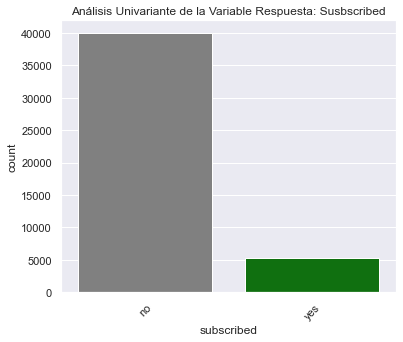

In [23]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
target = sns.countplot(x="subscribed", data = train, palette=colors, order = train["subscribed"].value_counts().index)
target.tick_params(axis='x', rotation=45)
plt.title("Análisis Univariante de la Variable Respuesta: Susbscribed")
plt.show()


In [24]:
#Creamos una tabla agrupada:
print('El porcentaje de clientes que suscriben el depósito es:', round(len(train[train.subscribed=='yes'])/len(train)*100,2),'%')

El porcentaje de clientes que suscriben el depósito es: 11.7 %


Un gran número de clientes no ha suscrito el depósito que ofrece el banco. Sólo un 11,7% lo han aceptado, por ello, tenemos un problema de variable respuesta poco balanceada.

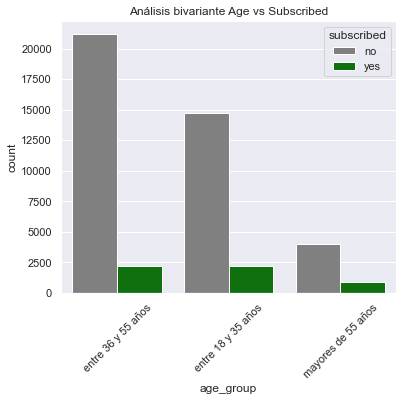

,age_group,subscribed_x,subscribed_y,proportion_subscribed
2,mayores de 55 años,906,4900,0.184898
0,entre 18 y 35 años,2189,16907,0.129473
1,entre 36 y 55 años,2194,23404,0.093745


In [25]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="age_group", data = train, hue = "subscribed", palette=colors, order = train["age_group"].value_counts().index)
job.tick_params(axis='x', rotation=45)
plt.title("Análisis bivariante Age vs Subscribed")
plt.show()

#Sacamos tabla de proporción de depósitos subscritos
total=train.groupby(['age_group']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['age_group']).subscribed.count()

df_proportion_age = pd.merge(parcial, total, how='left', on=['age_group']).reset_index()
df_proportion_age['proportion_subscribed'] = df_proportion_age['subscribed_x'] / df_proportion_age['subscribed_y']
df_proportion_age.sort_values('proportion_subscribed', ascending=False)

Los que más créditos suscriben son los mayores de 55 (incluye a los jubilados), seguido de los menores de 35 (incluye estudiantes).

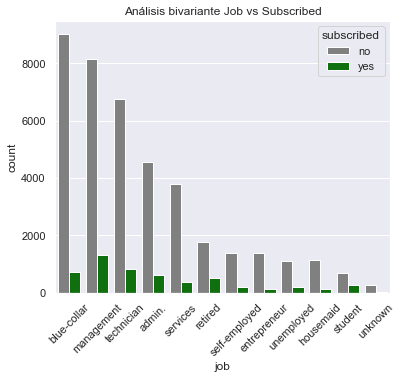

,job,subscribed_x,subscribed_y,proportion_subscribed
8,student,269,938,0.286780
5,retired,516,2264,0.227915
10,unemployed,202,1303,0.155027
4,management,1301,9458,0.137556
0,admin.,631,5171,0.122027
6,self-employed,187,1579,0.118429
11,unknown,34,288,0.118056
9,technician,840,7597,0.110570
7,services,369,4154,0.088830
3,housemaid,109,1240,0.087903


In [26]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="job", data = train, hue = "subscribed", palette=colors, order = train["job"].value_counts().index)
job.tick_params(axis='x', rotation=45)
plt.title("Análisis bivariante Job vs Subscribed")
plt.show()

#Sacamos tabla de proporción de depósitos subscritos
total=train.groupby(['job']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['job']).subscribed.count()

df_proportion = pd.merge(parcial, total, how='left', on=['job']).reset_index()
df_proportion['proportion_subscribed'] = df_proportion['subscribed_x'] / df_proportion['subscribed_y']
df_proportion.sort_values('proportion_subscribed', ascending=False)


 Los estudiantes son los que más depósitos suscriben en proporción al número de clientes, seguido de los jubilados, desempleados y de puestos de gestión empresarial. Dentro de la gente que trabaja (la mayoría de los clientes), vemos que es más probable que personas con puestos de más alta escala accedan a abrir un depósito en el banco que obreros o empleados del sector servicios.

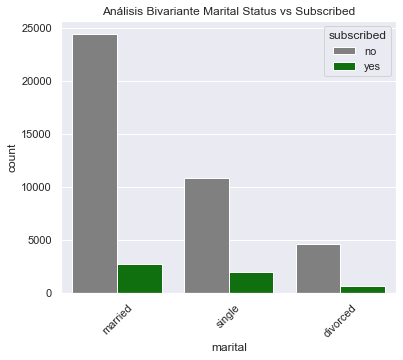

,marital,subscribed_x,subscribed_y,proportion_subscribed
2,single,1912,12790,0.149492
0,divorced,622,5207,0.119455
1,married,2755,27214,0.101235


In [27]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
marital = sns.countplot(x="marital", data = train, hue = "subscribed", palette=colors, order = train["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariante Marital Status vs Subscribed")
plt.show()

#Sacamos tabla de proporción de depósitos subscritos
total=train.groupby(['marital']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['marital']).subscribed.count()

df_proportion_m = pd.merge(parcial, total, how='left', on=['marital']).reset_index()
df_proportion_m['proportion_subscribed'] = df_proportion_m['subscribed_x'] / df_proportion_m['subscribed_y']
df_proportion_m.sort_values('proportion_subscribed', ascending=False)

Se contacta mas con casados, que con solteros o divorciados, pero los casados son los que menos depósitos suscriben

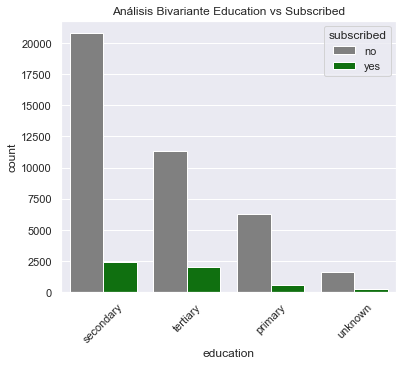

,education,subscribed_x,subscribed_y,proportion_subscribed
2,tertiary,1996,13301,0.150064
3,unknown,252,1857,0.135703
1,secondary,2450,23202,0.105594
0,primary,591,6851,0.086265


In [28]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
education = sns.countplot(x="education", data = train, hue = "subscribed",  palette=colors, order = train["education"].value_counts().index)
education.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariante Education vs Subscribed")
plt.show()

#Sacamos tabla de proporción de depósitos subscritos
total=train.groupby(['education']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['education']).subscribed.count()

df_proportion_e = pd.merge(parcial, total, how='left', on=['education']).reset_index()
df_proportion_e['proportion_subscribed'] = df_proportion_e['subscribed_x'] / df_proportion_e['subscribed_y']
df_proportion_e.sort_values('proportion_subscribed', ascending=False)

La gente con mayor educación suscribe más depósitos

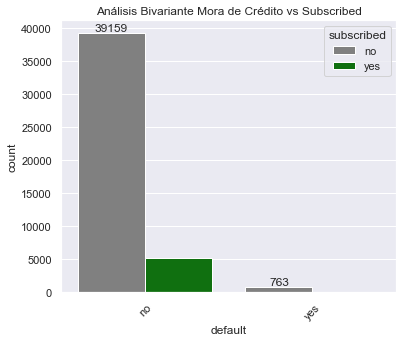

In [29]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
default = sns.countplot(x="default", data = train, hue = "subscribed",  palette=colors, order = train["default"].value_counts().index)
default.tick_params(axis='x', rotation=45)
default.bar_label(default.containers[0])

plt.title("Análisis Bivariante Mora de Crédito vs Subscribed")
plt.show()

Hay pocos clientes con mora de crédito y nunca suscriben el depósito. Sería un tipo de clientes claro para descartar en campañas de estos productos.

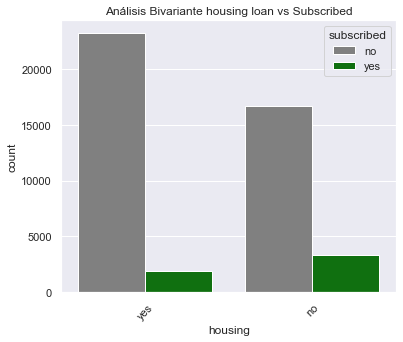

In [30]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
housing = sns.countplot(x="housing", data = train, hue = "subscribed",  palette=colors, order = train["housing"].value_counts().index)
housing.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariante housing loan vs Subscribed")
plt.show()

Relación inversa entre variables. La gente con crédito hipotecario es más contactada, pero suscriben menos depósitos de dinero

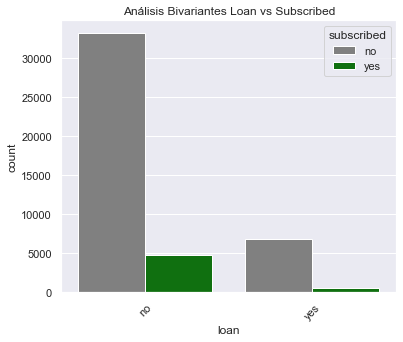

In [31]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
loan = sns.countplot(x="loan", data = train, hue = "subscribed",  palette=colors, order = train["loan"].value_counts().index)
loan.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariantes Loan vs Subscribed")
plt.show()

Los clientes con préstamo personal no suelen abrir depósitos en el banco, ni son fuente de interés, por ello, se les contacta menos.
Este sería otro grupo claro para descartar en las campañas (omitir clientes con préstamo personal)

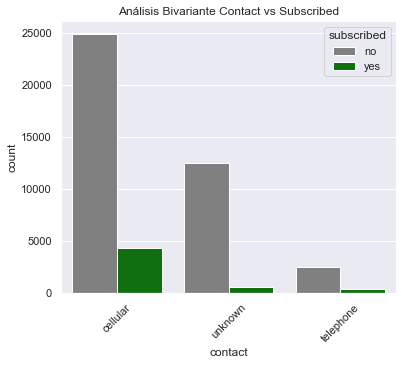

,contact,subscribed_x,subscribed_y,proportion_subscribed
0,cellular,4369,29285,0.149189
1,telephone,390,2906,0.134205
2,unknown,530,13020,0.040707


In [32]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
contact = sns.countplot(x="contact", data = train, hue = "subscribed", palette=colors, order = train["contact"].value_counts().index)
contact.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariante Contact vs Subscribed")
plt.show()

#Sacamos tabla de proporción de depósitos subscritos
total=train.groupby(['contact']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['contact']).subscribed.count()

df_proportion_c = pd.merge(parcial, total, how='left', on=['contact']).reset_index()
df_proportion_c['proportion_subscribed'] = df_proportion_c['subscribed_x'] / df_proportion_c['subscribed_y']
df_proportion_c.sort_values('proportion_subscribed', ascending=False)

El medio de contacto más usado es el teléfono movil. Los dos medios de contacto de la campaña tienen una proporción de suscritos al depósito muy similar

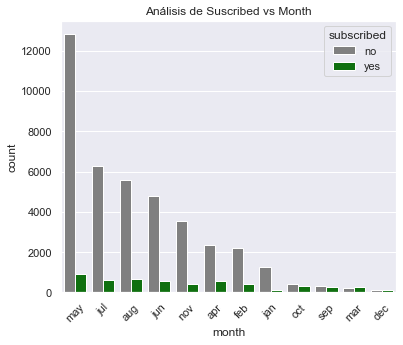

,month,subscribed_x,subscribed_y,proportion_subscribed
7,mar,248,477,0.519916
2,dec,100,214,0.467290
11,sep,269,579,0.464594
10,oct,323,738,0.437669
0,apr,577,2932,0.196794
3,feb,441,2649,0.166478
1,aug,688,6247,0.110133
6,jun,546,5341,0.102228
9,nov,403,3970,0.101511
4,jan,142,1403,0.101212


In [33]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
month = sns.countplot(x="month", data = train, hue = "subscribed",  palette=colors, order = train["month"].value_counts().index)
month.tick_params(axis='x', rotation=45)
plt.title("Análisis de Suscribed vs Month")
plt.show()

#Vemos la proporcion de depositos suscritos
total=train.groupby(['month']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['month']).subscribed.count()

df_proportion_month = pd.merge(parcial, total, how='left', on=['month']).reset_index()
df_proportion_month['proportion_subscribed'] = df_proportion_month['subscribed_x'] / df_proportion_month['subscribed_y']
df_proportion_month.sort_values('proportion_subscribed', ascending=False)

Mayo es el mes con más contactos a los clientes, pero en general, podemos observar que, el verano es el periodo en el que más se ha contactado con los clientes durante la campaña. En contra posición a los meses de invierno, que es cuando menos contactos se han hecho.
La variable respuesta, subscribed, aumenta la proporción de "yes" en marzo, septiembre y octubre y diciembre. Sin embargo, esta conclusión no podemos valorarla bien porque en esos meses hay muy poco volumen.

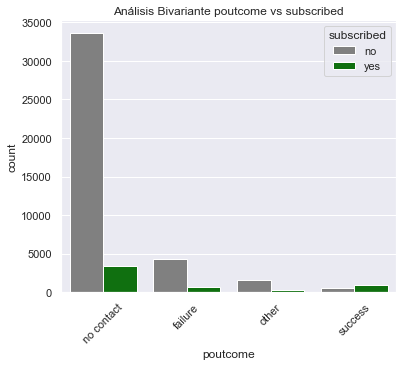

,poutcome,subscribed_x,subscribed_y,proportion_subscribed
3,success,978,1511,0.647253
2,other,309,1845,0.167480
0,failure,618,4901,0.126097
1,no contact,3384,36954,0.091573


In [34]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
poutcome = sns.countplot(x="poutcome", data = train, hue = "subscribed",  palette=colors, order = train["poutcome"].value_counts().index)
poutcome.tick_params(axis='x', rotation=45)
plt.title("Análisis Bivariante poutcome vs subscribed")
plt.show()

#Vemos la proporcion de depositos suscritos
total=train.groupby(['poutcome']).subscribed.count()
parcial=train[train.subscribed=='yes'].groupby(['poutcome']).subscribed.count()

df_proportion_pout = pd.merge(parcial, total, how='left', on=['poutcome']).reset_index()
df_proportion_pout['proportion_subscribed'] = df_proportion_pout['subscribed_x'] / df_proportion_pout['subscribed_y']
df_proportion_pout.sort_values('proportion_subscribed', ascending=False)

La mayoría de los clientes no conocían la campaña previa realizada. Los que si la conocían y fueron impactados con éxito, suscribieron más el depósito. Esta variable también la vamos a omitir en el estudio porque tiene muy pocos datos de valor conocido, por lo que no tenemos volumen suficiente para que sea representativa.

### Análisis Variables Numéricas

Analizamos la correlación entre variables numéricas

In [35]:
#Incluimos la variable respuesta tipo numérica (nombre asignado: y) para poder estudiarla en la matriz de correlaciones
train.loc[(train.subscribed == "yes"),"y"] = 1 # 0 means subscribed no 1 means yes
train.loc[(train.subscribed == "no") ,"y"] = 0

plt.subplots(nrows=1, ncols=1, figsize=(40, 40))

sns.heatmap(
    df_encoded.corr(numeric_only = True),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 18},
    linewidths = 1,
    vmin      = -1,
    vmax      = 1,
    cmap = 'Greens',
    mask = np.triu(df_encoded.corr()),
    square    = True
)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matriz de Correlaciones", fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'balance'),
  Text(0, 2.5, 'day'),
  Text(0, 3.5, 'duration'),
  Text(0, 4.5, 'campaign'),
  Text(0, 5.5, 'pdays'),
  Text(0, 6.5, 'previous'),
  Text(0, 7.5, 'y')])

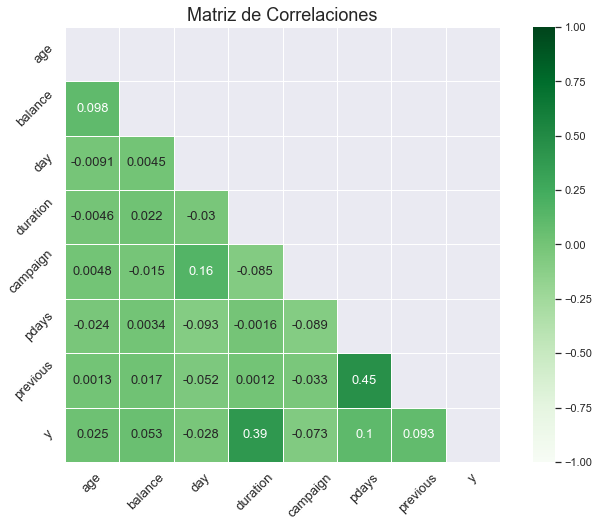

In [36]:
plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

sns.heatmap(
    train.corr(numeric_only = True),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 13},
    linewidths = 1,
    vmin      = -1,
    vmax      = 1,
    cmap = 'Greens',
    mask = np.triu(train.corr()),
    square    = True
)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title("Matriz de Correlaciones", fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

Viendo la matriz de correlación, podemos observar lo siguiente:
- La variable duración de la llamada de la campaña en segundos influye en que el cliente suscriba el depósito con relación directa.
- Previous y pdays están correlacionadas positivamente. Esto es evidente, ya que guardan relación, porque indican cuantas campañas previas se han realizado a un cliente concreto y cuantos días hace desde ese último contacto (si lo hubo) respectivamente.
- Campaña también se correlaciona con día, siendo campaña cuantos impactos ha tenido un cliente en esta campaña y día el día del mes del último contacto.
- Balance anual de la cuenta se relaciona con la edad, los clientes con mayor edad tienden a saldos medios anuales positivos

Ahora vemos la relación entre las variables cuantitativas dos a dos y de forma individual en la diagonal, estudiándolas en función de la variable respuesta

In [37]:
train.groupby('subscribed').median()

,age,balance,day,duration,campaign,pdays,previous,y
subscribed,,,,,,,,
no,39.0,417.0,16.0,164.0,2.0,-1.0,0.0,0.0
yes,38.0,733.0,15.0,426.0,2.0,-1.0,0.0,1.0


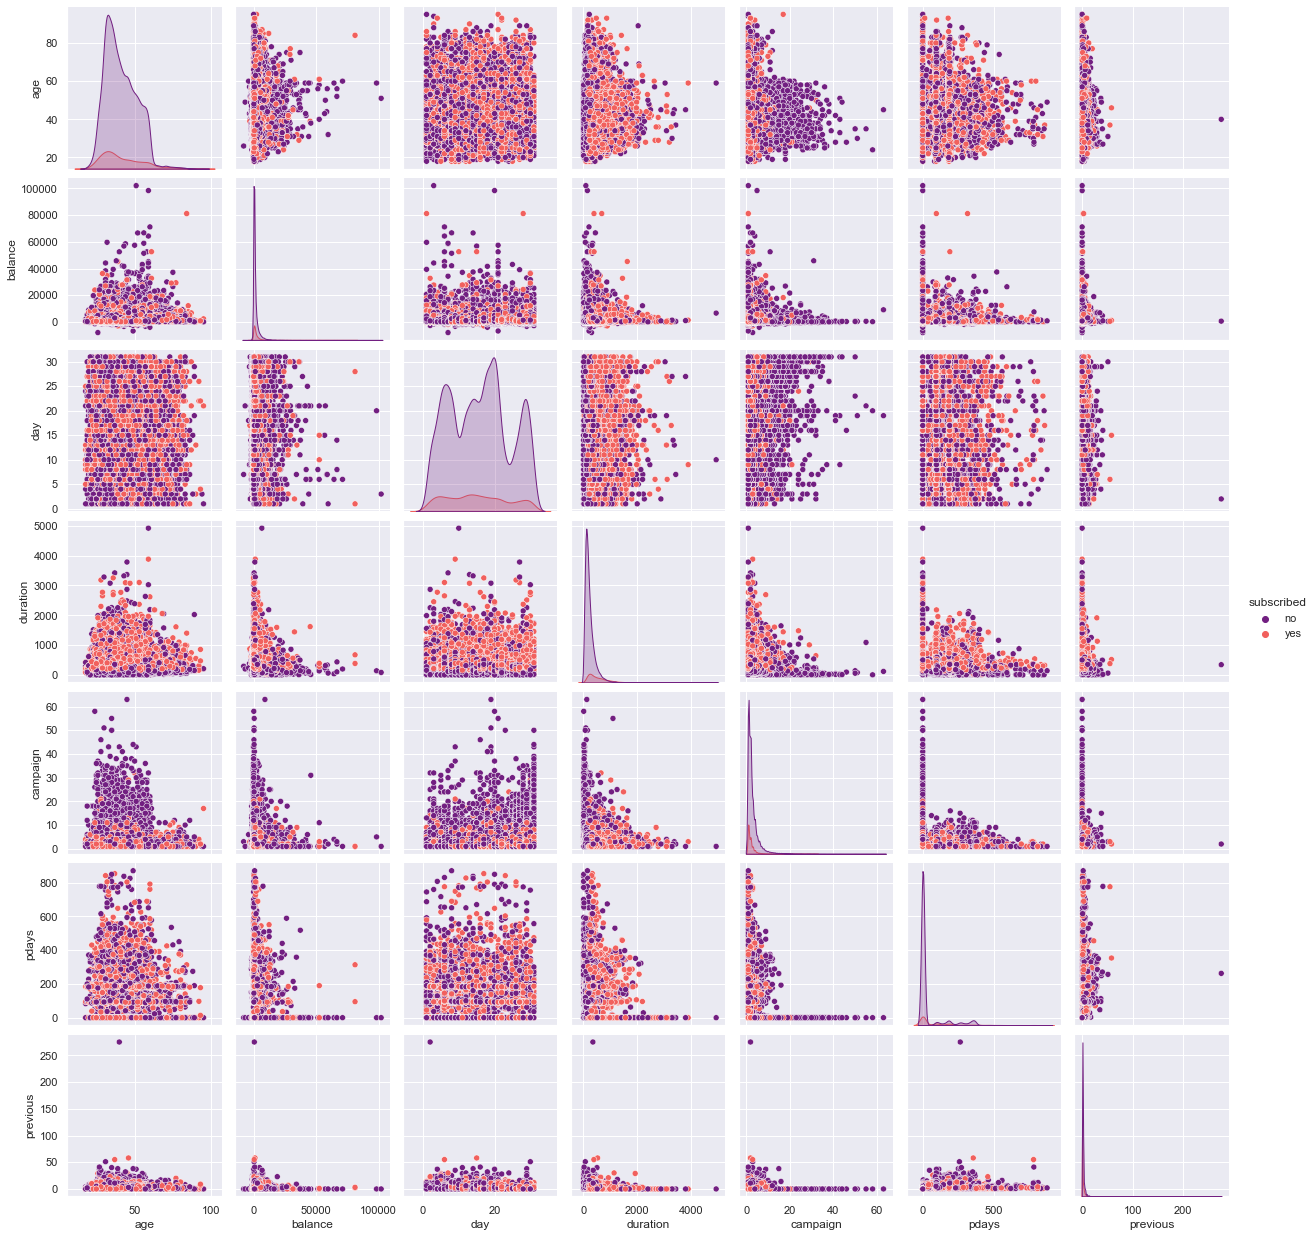

In [38]:
sns.set()
cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','subscribed']
sns.pairplot(train[cols], hue="subscribed", palette='magma')

plt.show()

Incluimos algún estudio dos a dos independiente de las variables que nos resultan más interesantes:

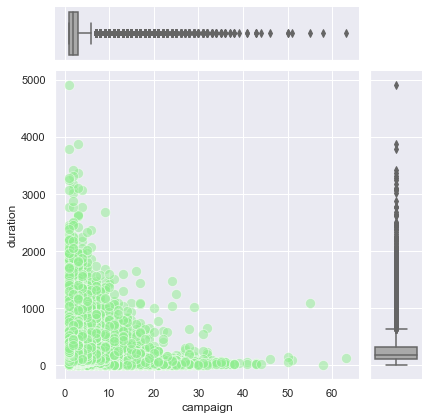

In [39]:
g = sns.JointGrid(data=train, x="campaign", y="duration")
g.plot_joint(sns.scatterplot, s=100, alpha=.5, color='lightgreen')
g.plot_marginals(sns.boxplot, color='darkgrey')

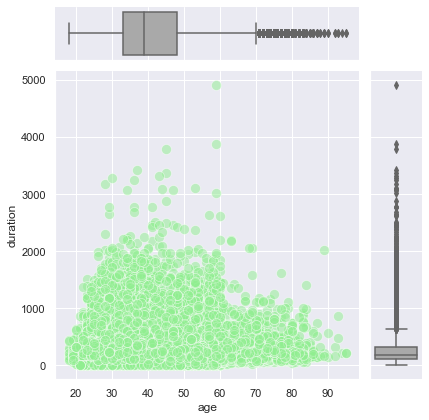

In [40]:
g = sns.JointGrid(data=train, x="age", y="duration")
g.plot_joint(sns.scatterplot, s=100, alpha=.5, color='lightgreen')
g.plot_marginals(sns.boxplot, color='darkgrey')

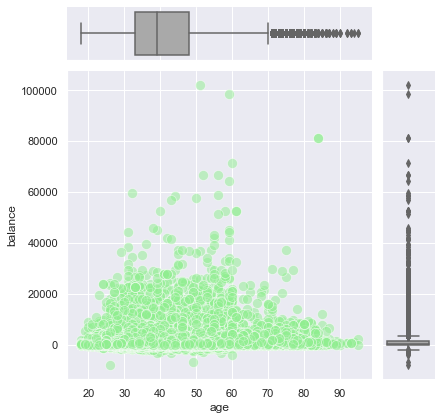

In [41]:
g = sns.JointGrid(data=train, x="age", y="balance")
g.plot_joint(sns.scatterplot, s=100, alpha=.5, color='lightgreen')
g.plot_marginals(sns.boxplot, color='darkgrey')

Conclusiones que extraemos de estas variables. Primero observamos cada variable con respecto a las otras:
- La edad es independiente de todas las variables, excepto del número de contactos en esta campaña y la duración de dichos contactos, que podemos observar como disminuyen conforme aumenta la edad
- Respecto a los saldos medios anuales parecen no tener dependencia con ninguna variable numérica. En la edad si podemos ver que a edades tempranas o muy maduras, los saldos son menores.
- El día de la campaña es independiente a todo, distribución casi uniforme
- La duración de las llamadas aumenta cuantos menos contactos se hacen al cliente con la campaña. También podemos observar como entre la gente más joven las llamadas son de menor duración.

Ahora observamos la relación contra la variable respuesta, si suscriben o no el depósito a plazo:
- La edad de la gente que suscribe el depósito se concentra entre los 20 y los 55 años aproximadamente, con un pico en los 40. La distribución podría aproximarse a una normal.
- El saldo medio anual tiene una distribución con cola a la derecha (asimetría positiva).
- El día del mes de lanzamiento de la última campaña tiene una distribución aproximadamente uniforme.
- La duración de las llamadas en la campaña tiene cola a la derecha (asimetría positiva). Una mayor duración de las llamadas, parece inducir a más suscripción de un depósito a plazo.
- Con las variables, campañas, pdays y previous ocurre esto mismo, distribución asimétrica positiva. De estas variables sólo es reseñable, que un menor número de contactos en esta campaña es más eficaz para la suscripción de un depósito.

En general se observa mucho solapamiento, no hay correlación. Las variables tienen muchos outliers, sobre todo por arriba, mucha dispersión.

### Análisis multivariante

En este punto vamos a coger las variables numéricas y categóricas que parecen más significativas y que podrían tener relación para sacar conclusiones adicionales.

<AxesSubplot:xlabel='balance', ylabel='job'>

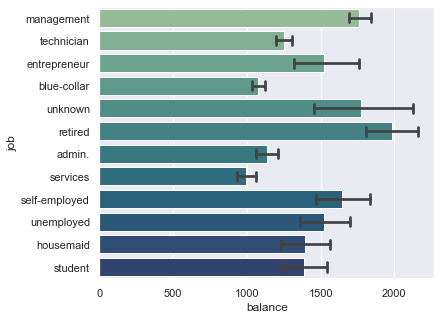

In [42]:
sns.barplot(
    data=train, x="balance", y="job",
     capsize=.4, palette= 'crest'
)

Tienen un saldo medio anual más bajo el sector servicios, los obreros, los administrativos y los técnicos. Los trabajos que se relacionan con saldos anuales mayores tienen mayor varianza (más dispersos)

<AxesSubplot:xlabel='marital', ylabel='balance'>

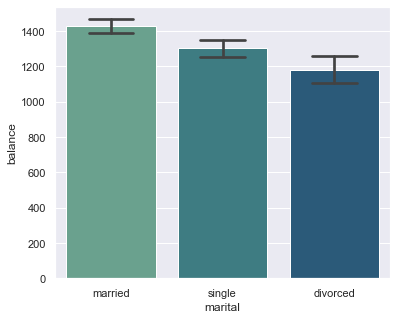

In [43]:
sns.barplot(
    data=train, y="balance", x="marital",
     capsize=.4, palette= 'crest'
)

Los clientes que están casados tienen saldos medios anuales superiores a los solteros, y estos a su vez mayor que los divorciados.

<AxesSubplot:xlabel='default', ylabel='balance'>

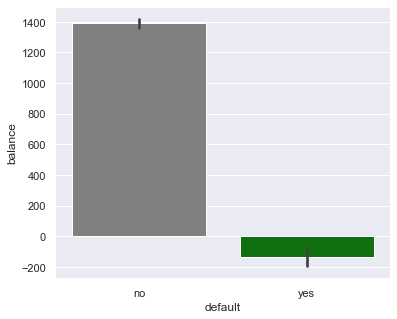

In [44]:
sns.barplot(data=train, x="default", y="balance", palette=colors)

Los clientes con mora de crédito tienen saldos medios anuales negativos

<AxesSubplot:xlabel='housing', ylabel='balance'>

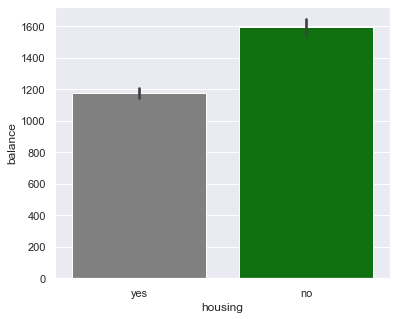

In [45]:
sns.barplot(data=train, x="housing", y="balance", palette=colors)

Los clientes sin hipoteca tienen saldos medios anuales mayores

<AxesSubplot:xlabel='loan', ylabel='balance'>

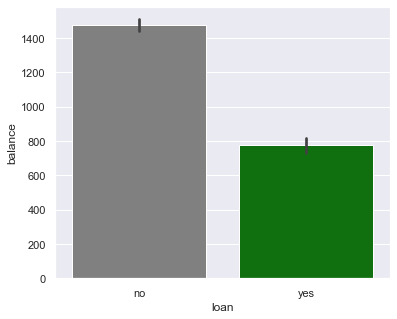

In [46]:
sns.barplot(data=train, x="loan", y="balance", palette=colors)

Los clientes con créditos pesonales tienen saldos medios anuales menores que los clientes que no tienen préstamos personales

<AxesSubplot:xlabel='subscribed', ylabel='balance'>

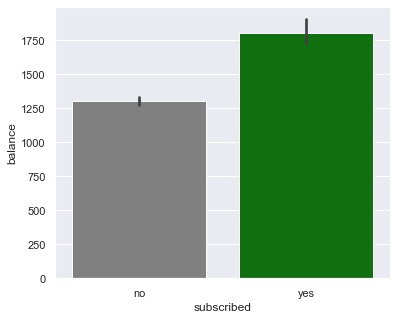

In [47]:
sns.barplot(data=train, x="subscribed", y="balance", palette=colors)

Los clientes con mayores saldos anuales suscriben más créditos.

<AxesSubplot:xlabel='contact', ylabel='duration'>

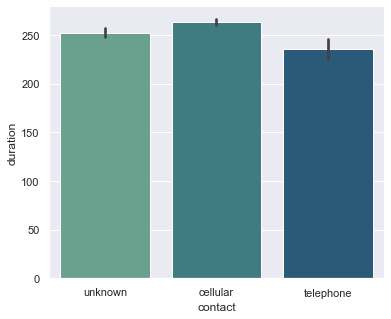

In [48]:
sns.barplot(data=train, x="contact", y="duration", palette='crest')

La duración del contacto es independiente el tipo (medio) de contacto en la campaña

### Conclusiones

**Teniendo en cuenta las características del cliente:**

- Aumenta la proporción de depósitos suscritos cuando el cliente tiene más de 35 años.
- Cuando es jubilado, estudiante o tiene cargos de gestión de empresas y, por consiguiente, cuanto más formado esté.
- Además, a mayor saldo anual medio, más depósitos suscritos. Entendemos que se trata de gente con buena capacidad económica.
- Disminuye la proporción de depósitos suscritos cuando los clientes tienen préstamos personales, hipotecas o moras de crédito.
- También, disminuyen cuando los clientes trabajan por cuenta propia (empresario)

**En cuanto a la campaña realizada:**

Podemos extraer la conclusión de que es más eficaz menos impactos en una campaña, con una comunicación más exhaustiva y duradera en el tiempo, aunque esto último depende a su vez de la edad de los clientes, ya que gente más joven requiere menor tiempo.

Además, la mayoría de clientes no han sido impactados con otras campañas anteriores, pero los que si que lo han sido, suscriben más créditos si la campaña fue un éxito.

*Excluimos de aquí en adelante las variables: day y contact, debido a que no aportan valor a la variable respuesta o/y tienen bastantes datos con valor desconocido.*


La variable contact vemos que aunque el cliente haya recibido campañas ahora (todos han sido contactados) tenemos muchos valores desconocidos.

In [49]:
train[train.campaign==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group,y


In [50]:
train[train.campaign>0].groupby('contact').contact.count()

contact
cellular     29285
telephone     2906
unknown      13020
Name: contact, dtype: int64

Como comentábamos la variable day, tiene una distribución casi uniforme y no se ve variación de la variable respuesta en función del día de la campaña

<AxesSubplot:xlabel='day', ylabel='count'>

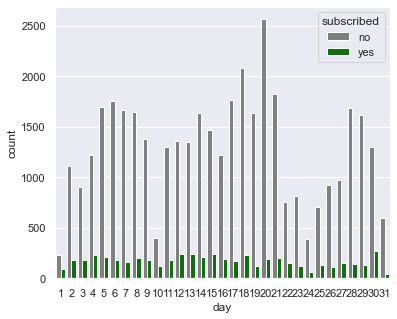

In [51]:
sns.countplot(data=train, x="day", hue="subscribed", palette=colors)

In [52]:
df_encoded.drop(columns = ["contact", "day"],inplace = True)
df_encoded

,education,default,balance,housing,loan,duration,campaign,pdays,previous,subscribed,...,poutcome_other,poutcome_success,poutcome_unknown,marital_divorced,marital_married,marital_single,entre 18 y 35 años,entre 36 y 55 años,mayores de 55 años,month_num
0,3,0,2143,1,0,261,1,-1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0
1,2,0,29,1,0,151,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0
2,2,0,2,1,1,76,1,-1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0
3,0,0,1506,1,0,92,1,-1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0
4,0,0,1,0,0,198,1,-1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,0,825,0,0,977,3,-1,0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0
45207,1,0,1729,0,0,456,2,-1,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,11.0
45208,2,0,5715,0,0,1127,5,184,3,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0
45209,2,0,668,0,0,508,4,-1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0


## MODELOS

In [53]:
#Separamos las características de la variable objetivo
X = df_encoded.drop('subscribed', axis=1)
y = df_encoded['subscribed']

Las variables no siguen una distribución normal y tienen outliers por ello es necesario estandarizar los datos, sobre todo para usarlos en los modelos que utilizan distancias.

In [54]:
#Estandarizamos las variables. En la técnica PCA las variables deben estar normalizadas ya que se buca la varianza máxima de los datos. Por ello, si no se normaliza, dominaran las variables con rasgos más amplios. Es importante para asegurar que todas las variables contribuyan por igual a la varianza total.
X_nor = StandardScaler().fit_transform(X)
X_nor=pd.DataFrame(X_nor)

#Incluyo el nombre de las columnas de nuevo
nombres_columnas=X.columns.to_list()
X_nor.columns = nombres_columnas

### REDUCCION DE LA DIMENSIONALIDAD

Cuando aumenta la dimensionalidad, el volumen del espacio aumenta exponencialmente haciendo que los datos disponibles se vuelven dispersos. Esta dispersión es problemática para cualquier método que requiera significación estadística.

Las técnicas de reducción de la dimensionalidad buscan preservar la información más relevante y significativa de los datos, mientras se elimina la información redundante o menos relevante.
Tipos:
- La selección de características, que selecciona un subconjunto de características relevantes para el análisis
- La extracción de características, que transforma los datos originales en un conjunto de características nuevas y más compactas. Vamos a probar las siguientes:
    - PCA (Análisis de componentes principales): es un algortimo lineal que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información.
    - t-SNE (T-distributed Stochastic Neighbor Embedding): es una técnica de reducción no lineal para transformar datos de alta dimensión en una representación de baja dimensión. Traslada los puntos de una dimensión superior a una dimensión inferior tratando de preservar el vecindario de ese punto.
    - MDS (Escalado Multidimensional): se utiliza para proyectar datos de alta dimensión en un espacio de menor dimensión mientras se preservan las distancias por pares entre los puntos de datos tanto como sea posible. MDS se basa en el concepto de distancia y tiene como objetivo encontrar una proyección de los datos que minimice las diferencias entre las distancias en el espacio original y las distancias en el espacio de menor dimensión.

#### PCA

El método PCA permite “condensar” la información aportada por múltiples variables en solo unas pocas componentes.
¿Cuánta información presente en el set de datos original se pierde al proyectar las observaciones en un espacio de menor dimensión? ¿Cuanta información es capaz de capturar cada una de las componentes principales obtenidas? Para contestar a estas preguntas se recurre a la proporción de varianza explicada por cada componente principal.

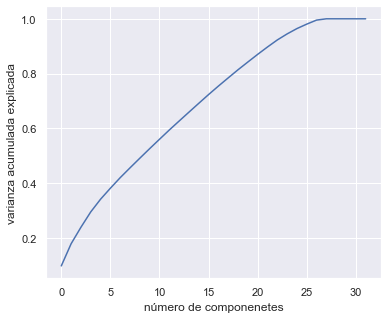

In [55]:
#Aplicamos PCA por defecto para ver la varianza acumulada que se explica en función del número de compnentes
pca_ = PCA()
pca_global = pca_.fit(X_nor)

plt.plot(np.cumsum(pca_global.explained_variance_ratio_))
plt.xlabel('número de componenetes')
plt.ylabel('varianza acumulada explicada');

Se ven codos en 4 componentes, pero la explicabilidad acumulada de varianza es muy baja. Vemos como a partir de 20 variables también cambia la tendencia, pero es un número muy alto de componentes. Por ello, decidimos coger el número de variables que explican un 70% de la varianza.

In [56]:
#Aplicamos PCA de froma que nos del número de componentes necesario que representan el 70% de la varianza
pca = PCA(n_components=0.7, random_state=42)
components = pca.fit_transform(X_nor)

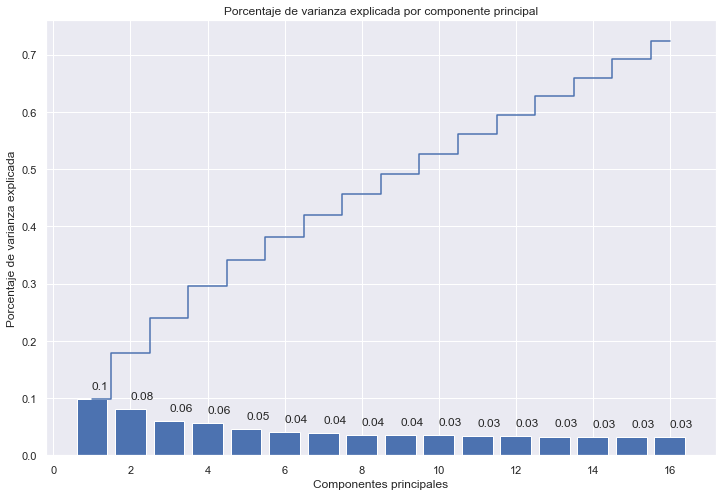

In [57]:
#Representación gráfica
var_ratios = list(pca.explained_variance_ratio_)
cumulative_var = list(np.cumsum(pca.explained_variance_ratio_))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = var_ratios
)

for x, y in zip(np.arange(len(pd.DataFrame(df_encoded).columns)) + 1, var_ratios):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
    )

ax.step(np.arange(pca.n_components_) + 1, cumulative_var, where='mid')

plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.title('Porcentaje de varianza explicada por componente principal')
plt.show()

In [58]:
#Creamos el Dataset resultado de la PCA
X_pca = pd.DataFrame(components)

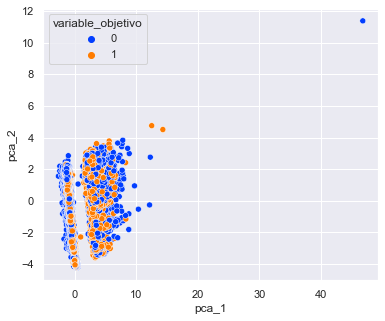

In [59]:
#Para representarlo lo into en 2D
pca_2comp = PCA(n_components=2, random_state=42)
components_2D = pca_2comp.fit_transform(X_nor)

pca_df = pd.DataFrame(components_2D, columns=['pca_1', 'pca_2'])
pca_df['variable_objetivo'] = df_encoded['subscribed']

sns.scatterplot(data=pca_df, x='pca_1', y='pca_2', hue='variable_objetivo', palette='bright')
plt.show()

No se ven grupos separados esto podría implicar que los datos no presentan una estructura subyacente clara o que la técnica de reducción de dimensionalidad no es la adecuada para el conjunto de datos. Además, necesitamos un gran número de componentes para explicar suficiente variabilidad.
PCA, tiene algunas limitaciones, solo tiene en cuenta combinaciones lineales de las variables originales.

#### TSNE

El algoritmo de t-SNE calcula la probabilidad condicional de cada par de observaciones y trata de minimizar la suma de las diferencias entre las probabilidades de la dimensión superior e inferior.

In [61]:
#En primer lugar, probamos pasando el conjunto completo. En el caso de TSNE no necesita que las variables estén previamente estandarizados ya que se basa en similitud entre puntos
tsne = TSNE(n_components=2, random_state=0, n_iter=1000)
X_tsne = tsne.fit_transform(X)

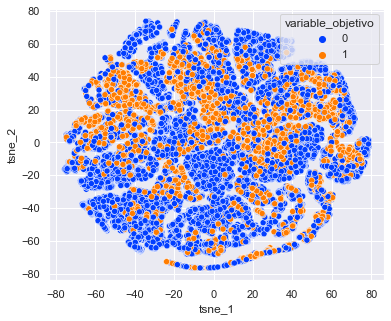

In [62]:
# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(X_tsne, columns=['tsne_1', 'tsne_2'])
tsne_df['variable_objetivo'] = df_encoded['subscribed']

# Grafico
sns.scatterplot(data=tsne_df, x='tsne_1', y='tsne_2', hue='variable_objetivo', palette='bright')
plt.show()

No se aprecian grupos claramente diferenciados utilizando esta técnica sobre el dataset completo. Aunque si parece que se separa la variable respuesta 0 de la 1.

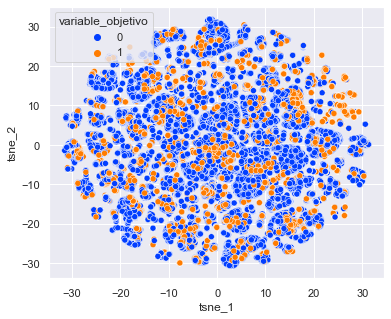

In [63]:
#Probamos usando como entrada de TSNE la salida del PCA, Dataset ya reducido que contiene el 70% de la varianza del original
tsne = TSNE(n_components=2, random_state=0, n_iter=500)
X_tsne_pca = tsne.fit_transform(X_pca)

#Dataset de salida TSNE
tsne_pca_df = pd.DataFrame(X_tsne_pca, columns=['tsne_1', 'tsne_2'])
tsne_pca_df['variable_objetivo'] = df_encoded['subscribed']

# Grafico
sns.scatterplot(data=tsne_pca_df, x='tsne_1', y='tsne_2', hue='variable_objetivo', palette='bright')
plt.show()

No se observa nada, tampoco respecto a la variable respuesta del dataset

El algortimo TSNE tiene algunas desventajas como su baja interpretación, determinismo y que esta diseñado para reducir a 2 o 3 dimensiones unicamente. Es muy bueno para la visualización.

#### MDS

MDS se usa comúnmente para visualizar datos complejos, no lineales y de alta dimensión, y para identificar patrones y relaciones que pueden no ser evidentes en el espacio original. Se puede aplicar a una amplia gama de tipos de datos, incluidos datos numéricos, categóricos y mixtos. Se basa en medir distancias.

**MDS con los valores por defecto**

In [ ]:
#Tenemos que coger una muestra del dataset normalizado porque es un algoritmo muy costoso y en muchos casos da incluso error de memoria
#Se usa normalizado porque se miden distancias en este algoritmo
sample_4K = X_nor.sample(n=4000, random_state=42)

In [ ]:
# Crear objeto MDS y ajustarlo a los datos. Valores por defecto (euclideo, 4 inicializaciones, 300 iteraciones).
#Reduzco iteraciones para que no tarde tanto
mds_s = MDS(n_components=2, max_iter=10, random_state=42)
mds_simple = mds_s.fit_transform(sample_4K)

In [ ]:
#Saco el dataset obtenido de MDS por defecto
mds_s_df = pd.DataFrame(mds_simple, columns=['MDS_1', 'MDS_2'])
mds_s_df['variable_objetivo'] = df_encoded['subscribed']
sns.scatterplot(x='MDS_1', y='MDS_2', hue='variable_objetivo', data=mds_s_df)
plt.show()

Aplicamos MDS con matriz de correlaciones. A partir de esta matriz de similitud, se puede generar una representación visual del conjunto de datos en un espacio de menor dimensión, donde la distancia entre los objetos en el espacio refleja la similitud entre ellos en la matriz de similitud de correlaciones.

In [ ]:
mds_c = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
#Calculo de la matriz de similitud de correlaciones
X_pd_nor = pd.DataFrame(X_nor)
matriz_similitud = 1 - X_pd_nor.corr()

# Aplicar MDS a la matriz de similitud
mds_corr = mds_c.fit_transform(matriz_similitud)

In [ ]:
#Dataframe
mds_corr_df = pd.DataFrame(mds_corr, columns=['MDS_1', 'MDS_2'])
mds_corr_df['variable_objetivo'] = df_encoded['subscribed']
mds_corr_df

In [ ]:
#Grafico
sns.scatterplot(x='MDS_1', y='MDS_2', hue='variable_objetivo', data=mds_corr_df)
plt.show()

Esta distancia de correlación no sirve para los datos por estar desbalanceados

**MDS distancias euclideas**

In [ ]:
#Distancias euclideas precomputado y con más iteraciones. A igualdad de iteraciones mismo resultado que el de por defecto (primer caso)
similar_eucl = euclidean_distances(sample_4K)

# Crear objeto MDS y ajustarlo a los datos
mds = MDS(n_components=2, dissimilarity='precomputed', max_iter=100, random_state=42)
mds_eu = mds.fit_transform(similar_eucl)

In [ ]:
#Guardamos el dataset resultado de la reducción con dist. euclidea
mds_eu_df = pd.DataFrame(mds_eu, columns=['MDS_1', 'MDS_2'])
mds_eu_df['variable_objetivo'] = df_encoded['subscribed']

In [ ]:
#Grafico
sns.scatterplot(x='MDS_1', y='MDS_2', hue='variable_objetivo', data=mds_eu_df)
plt.show()

**MDS no metrico**
 Las diferencias 0, las toma como valores faltantes. Generalmente se usa con variables ordinales

In [ ]:
#MDS no metric
mds_nm = MDS(n_components=2, metric=False, random_state=42)
# Calculamos la matriz de similitud no métrica. Cogemos la muestra de 4K porque sino falla por memoria
nometric_mds = mds_nm.fit_transform(sample_4K)


In [ ]:
#DataFrame
nometric_mds_df = pd.DataFrame(nometric_mds, columns=['MDS_1', 'MDS_2'])
nometric_mds_df['variable_objetivo'] = df_encoded['subscribed']

In [ ]:
#Grafico
sns.scatterplot(x='MDS_1', y='MDS_2', hue='variable_objetivo', data=nometric_mds_df)
plt.show()

MDS ds sensible a valores atípicos y ruido en los datos.
Es una técnica de optimización global, lo que significa que encuentra una única proyección que es óptima para todo el conjunto de datos, no se adapta bien a datos multimodales

**Conclusiones**
Si el objetivo es encontrar patrones generales y reducir la complejidad de los datos, PCA puede ser una buena opción. Si el objetivo es visualizar estructuras complejas en los datos y preservar la estructura de clusters, t-SNE puede ser más apropiado. Si el objetivo es explorar y visualizar la estructura subyacente de los datos, la MDS puede ser una buena opción.

En general, deducimos de las técnicas aplicadas que no parece que se pueda reducir la dimensión de este dataset.

Puede ser que los datos no contengan estructura suficiente para poder ser visualizados de manera efectiva, aunque con TSNE aplicado sobre los datos originales se obtenían mejores visualizaciones.

 También es posible que los datos tengan ruido o que contengan demasiada variabilidad para poder ser resumidos de manera efectiva en un espacio de menor dimensión.

### Modelos no supervisados: Clustering

El clustering tiene como objetivo dividir un conjunto de datos en grupos o clústeres similares. Busca encontrar patrones y relaciones entre los datos sin tener etiquetas previas o información de clases.

En clustering si usamos la variable respuesta para entender los datos y agruparlos. Como los clustering usan distancias para sacar la similitud entre datos tenemos que normalizar o estandarizar el dataset:

In [64]:
#Estandarizamos
df_nor = StandardScaler().fit_transform(df_encoded)
df_nor = pd.DataFrame(df_nor)

#Incluyo el nombre de las columnas de nuevo
nombres_columnas = df_encoded.columns.to_list()
df_nor.columns = nombres_columnas

#### K-MEANS

El objetivo de K-Means es minimizar la varianza intra-cluster (la suma de las distancias cuadradas entre cada punto y el centroide del cluster al que pertenece)

**Probamos en primer lugar los cluster con el dataset estandarizado**

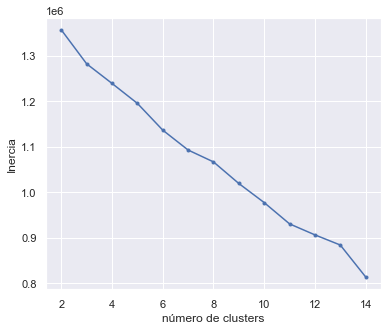

In [65]:
#La inercia es calcular la distancia de cada punto al cluster más cercano y representarlo
K = range(2,15)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_nor)
    inertia.append(kmeans.inertia_)

plt.plot(K,inertia,'.-')
plt.xlabel('número de clusters')
plt.ylabel('Inercia')
plt.show()

No se ve un número claro de grupos, por tanto probamos diferentes opciones y seleccionamos la mejor

[2 2 1 ... 0 2 0]
Cluster sizes k-means: [ 8253 13710 23248]
Cluster distances k-means: [2046619.21, 1630959.15, 1534555.95]


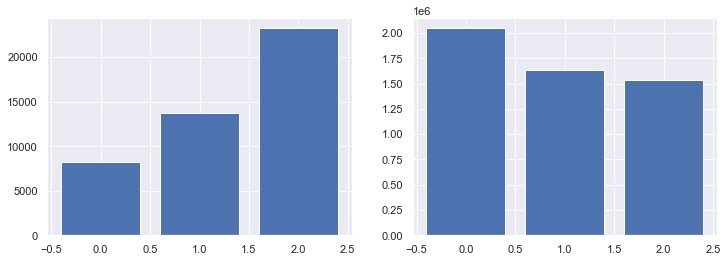

In [66]:
#Pruebo con varios números de clusters, mirando el número de registros y la distancia al centroide, junto con la explicabilidad de lso clusters en el paso anterior para seleccionar el número de clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_km = kmeans.fit_predict(X_nor)
print(labels_km)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

distances = []
for c in kmeans.cluster_centers_:
    d = np.sum(np.sum((X_nor - c) ** 2, axis=1) )
    distances.append(d.round(2))

print("Cluster distances k-means: {}".format(distances))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(range(k),np.bincount(labels_km))

plt.subplot(122)
plt.bar(range(k),distances)
plt.show()

Después de probar varias opciones, observamos que los clusters no tienen tamaños similares. Además, ladistancia al centroide en los grupos no es similar. Por estos motivos decidimos seleccionar variables del análisis que parecían de interés y tramificar las variables numéricas, y trabajar con datos normalizados (entre 0 y 1)

**Dataset reducido y tramificando variables numéricas**

In [67]:
#Incluyo numericas tramificadas que nos interesan
df_reduced = df_encoded
df_reduced.loc[(df_reduced.balance < 200),"balance_group"] = "balance bajo"
df_reduced.loc[(df_reduced.balance >= 200) & (df_reduced.balance <= 1000),"balance_group"] = "balance medio"
df_reduced.loc[(df_reduced.balance > 1000),"balance_group"] = "balance alto"
df_encoded=df_encoded.drop('balance_group', axis=1)

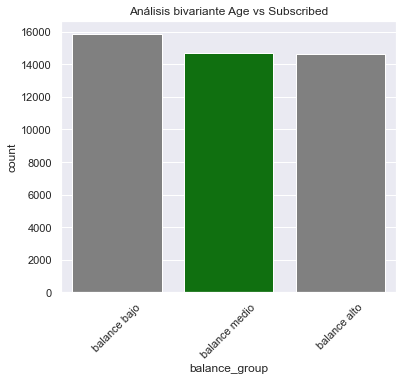

In [68]:
#Vemos que sean grupos con sentido y equitativos
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="balance_group", data = df_reduced, palette=colors, order = df_reduced["balance_group"].value_counts().index)
job.tick_params(axis='x', rotation=45)
plt.title("Análisis bivariante Age vs Subscribed")
plt.show()

In [69]:
#Codificamos
df_reduced = pd.concat((df_reduced , pd.DataFrame(ohe.fit_transform(df_reduced["balance_group"].to_frame()),columns = "" +                       np.sort(df_reduced["balance_group"].unique()))),axis = 1)
df_reduced.drop(columns = ["balance_group"],inplace = True)

In [70]:
#Incluyo numericas tramificadas que nos interesan
df_reduced.loc[(df_reduced.duration <= 120),"duration_campaign"] = "llamada breve"
df_reduced.loc[(df_reduced.duration > 120) & (df_reduced.duration <= 240),"duration_campaign"] = "llamada media"
df_reduced.loc[(df_reduced.duration > 240),"duration_campaign"] = "llamada larga"

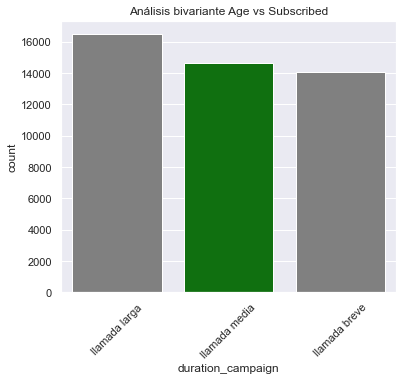

In [71]:
#Vemos que sean grupos con sentido y equitativos
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="duration_campaign", data = df_reduced, palette=colors, order = df_reduced["duration_campaign"].value_counts().index)
job.tick_params(axis='x', rotation=45)
plt.title("Análisis bivariante Age vs Subscribed")
plt.show()

In [72]:
df_reduced = pd.concat((df_reduced, pd.DataFrame(ohe.fit_transform(df_reduced["duration_campaign"].to_frame()),columns = "" +                       np.sort(df_reduced["duration_campaign"].unique()))),axis = 1)
df_reduced.drop(columns = ["duration_campaign"],inplace = True)

In [73]:
#Selecciono las variables que queremos incluir en la clusterización. Eliminando las que no
df_reduced = df_reduced.drop('month_num', axis=1)
df_reduced = df_reduced.drop('campaign', axis=1)
df_reduced = df_reduced.drop('pdays', axis=1)
df_reduced = df_reduced.drop('previous', axis=1)
df_reduced = df_reduced.drop('duration', axis=1)
df_reduced = df_reduced.drop('education', axis=1) # Me quedo con su variable tramificada
df_reduced = df_reduced.drop('balance', axis=1) # Me quedo con su variable tramificada
#Todas las variables van entre 0 y 1 no necesito estandarizar

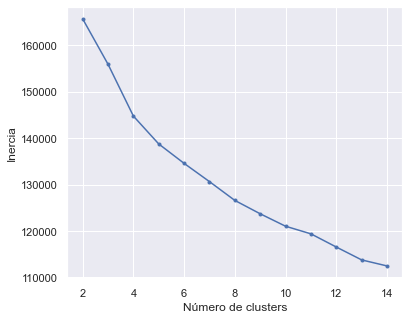

In [74]:
#La inercia es calcular la distancia de cada punto al cluster más cercano y representarlo
K = range(2,15)

inertia = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_reduced)
    inertia.append(kmeans.inertia_)

plt.plot(K,inertia,'.-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

En el gráfico veo un codo en k=5, aunque reviso varias opciones por si algún otro número de clusters ofrece mayor explicabilidad de clusters

[3 1 0 ... 3 4 3]
Cluster sizes k-means: [8095 9458 8906 9941 8811]
Cluster distances k-means: [226186.92, 228830.01, 257328.4, 230173.43, 230547.16]


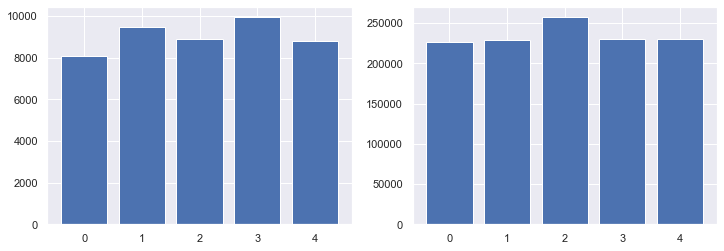

In [75]:
#Pruebo con varios números de clusters, mirando el número de registros y la distancia al centroide, junto con la explicabilidad de lso clusters en el paso anterior para seleccionar el número de clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels_km = kmeans.fit_predict(df_reduced)
print(labels_km)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

distances = []
for c in kmeans.cluster_centers_:
    d = np.sum(np.sum((df_reduced - c) ** 2, axis=1) )
    distances.append(d.round(2))

print("Cluster distances k-means: {}".format(distances))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.bar(range(k),np.bincount(labels_km))

plt.subplot(122)
plt.bar(range(k),distances)
plt.show()

Con 5 grupos tenemos clusters de tamaños y distancias al centroide similares

Explicamos los clusters:

In [76]:
#Sacamos Los datos de los clusters
#Centroides
centroids = kmeans.cluster_centers_

#Etiqueta Cluster Id
cluster_labels = kmeans.labels_

#Dataset con la clasificación del cluster para cada observacion
cluster_df = pd.DataFrame(cluster_labels, columns=['cluster_id'])

#Lo añadimos al dataset para encontrar la explicabilidad
df_reduced['cluster_id'] = cluster_df['cluster_id']

In [77]:
# Agrupar por el cluster y calcular la suma y el conteo de registros por cada columna dentro de cada grupo
suma = df_reduced.groupby('cluster_id').agg('sum')
count = df_reduced.agg('sum')

clusters = suma /count * 100
clusters['count'] = df_reduced.groupby('cluster_id')['loan'].agg('count')
pd.DataFrame(clusters.drop('cluster_id', axis=1))

,balance alto,balance bajo,balance medio,default,entre 18 y 35 años,entre 36 y 55 años,housing,job_admin.,job_blue-collar,job_entrepreneur,...,marital_divorced,marital_married,marital_single,mayores de 55 años,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,subscribed,count
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,14.359921,20.616934,18.502892,19.509202,47.879577,0.000000,22.566653,19.783407,22.348952,17.148621,...,16.573843,26.574557,0.000000,0.000000,18.526831,18.913043,11.978822,18.014557,13.972396,8095
1,0.000000,59.540447,0.000000,53.006135,0.000000,34.699197,20.246717,20.073487,22.174270,26.765299,...,32.571538,23.814948,10.015637,27.285714,17.955519,15.706522,10.589014,21.994643,12.932501,9458
2,17.695304,19.842619,21.537938,20.858896,52.120423,0.000000,18.770394,21.949333,14.097822,9.683927,...,0.537738,0.000000,69.413604,1.918367,19.465415,25.434783,26.340172,19.172597,27.680091,8906
3,67.944775,0.000000,0.000000,1.595092,0.000000,33.319091,18.925587,19.415974,20.150021,24.142569,...,24.774342,26.706842,10.813135,43.734694,23.280963,20.869565,31.899404,21.467031,27.982605,9941
4,0.000000,0.000000,59.959170,5.030675,0.000000,31.981713,19.490649,18.777799,21.228935,22.259583,...,25.542539,22.903653,9.757623,27.061224,20.771271,19.076087,19.192588,19.351173,17.432407,8811


El cluster 0 es de gente joven trabajadora con créditos con el banco y poca suscripción a depósitos
El cluster 1 es de clientes con balances bajos, con mora de crédito, mayores de 35 años y con menos tasa de éxito en la campaña previa, poca suscripción de depósitos
El cluster 2 tiene a los estudiantes (solteros), estos clientes suscriben más depósitos
El cluster 3 engloba a los clientes con altos balances, más mayores, en gran parte jubilados. Campaña más exitosa y mayor suscripción de créditos.
El cluster 4 destaca por tener clientes con balances intermedios mayores de 35 años

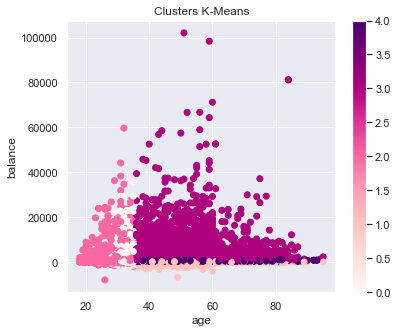

In [79]:
plt.scatter(train['age'], train['balance'], c=kmeans.labels_, cmap='RdPu')
plt.colorbar()
plt.title("Clusters K-Means")
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

Se ve en los clusters como a edades por debajo de 35 años el balance económico no es determinante en la formación de los clusters, pero sí lo es la edad.
Sin embargo, a edades posteriores, deja de ser característica la edad para tener más importancia las variables económicas y de otros préstamos

*Borro la variable cluster id de k-means del dataset para poder usarlo en otros modelos

In [80]:
df_reduced = df_reduced.drop('cluster_id', axis=1)

KeyError: "['cluster_id'] not found in axis"

#### DBSCAN

Encuentra grupos de puntos en un conjunto de datos en función de su densidad. A diferencia de los algoritmos basados en centroides, no requiere especificar el número de clusters de antemano. Identifica clusters de cualquier forma o tamaño.

In [ ]:
#for eps in [1, 3, 7, 20]:
    #for n in [100, 500, 1000]:
        #print("\neps={}".format(eps))
        #print("min sample={}".format(n))
        #dbscan = DBSCAN(eps=eps, min_samples=n)
        #labels = dbscan.fit_predict(X_nor)
        #print("Number of clusters: {}".format(len(np.unique(labels))))
        #print("Cluster sizes: {}".format(np.bincount(labels + 1)))

Probamos diferentes combinaciones de los parámetros. Eps indica la distancia máxima a la que si ya no encuentra observaciones lo considera de otro cluster, y min sample, el número mínimo de observaciones en un cluster para considerarlo un cluster.

En general, se observa que el número de clusters disminuye a medida que aumenta el valor de min_samples. Esto se debe a que un valor más alto de min_samples requiere que haya más puntos cercanos para formar un cluster.

Además, el número de clusters también varía en función del valor de eps. Cuando eps es demasiado pequeño, se pueden identificar muchos clusters pequeños. Cuando eps es demasiado grande, se pueden identificar pocos clusters grandes y algunos puntos pueden considerarse ruido incluso si pertenecen a un cluster.

En base a los resultados, probamos en el mejor rango para los parámetros en este modelo.

In [ ]:
#Prueba sobre el dataset completo estandarizado
for eps in [3, 4]:
    for n in [1000, 1500]:
        print("\neps={}".format(eps))
        print("min sample={}".format(n))
        dbscan = DBSCAN(eps=eps, min_samples=n)
        labels = dbscan.fit_predict(df_nor)
        print("Number of clusters: {}".format(len(np.unique(labels))))
        print("Cluster sizes: {}".format(np.bincount(labels + 1)))

In [ ]:
#Selecciono eps=4 y min_samples =1000 viendo los resultados con los diferentes hiperparámetros
dbscan = DBSCAN(eps=4, min_samples=1000)
db = dbscan.fit_predict(df_nor)

print("Number of clusters: {}".format(len(np.unique(db))))
print("Cluster sizes: {}".format(np.bincount(db + 1)))

In [ ]:
#Lo añadimos al dataset para encontrar la explicabilidad
df_dbscan=df_reduced
nombres_columnas=df_dbscan.columns.to_list()
df_dbscan.columns = nombres_columnas
df_dbscan['cluster_id'] = db

In [ ]:
# Agrupar por el cluster y calcular la suma y el conteo de registros por cada columna dentro de cada grupo
suma_db = df_reduced.groupby('cluster_id').agg('sum')
count_db = df_reduced.agg('sum')

Clusters_dbscan = suma_db /count_db * 100
Clusters_dbscan['count'] = df_dbscan.groupby('cluster_id')['loan'].agg('count')
pd.DataFrame(Clusters_dbscan)

In [ ]:
plt.scatter(train['age'], train['balance'], c=dbscan.labels_, cmap='PiYG')
plt.colorbar()
plt.title("Clusters DBSCAN")
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

DBSCAN no está funcionando, clasifica casi todo como ruido o en su defecto en el cluster 0.  Se han hecho numerosas pruebas y no se consigue encontrar explicabilidad con este método de clusterización. Esto podría deberse a que los datos tienen alta dimensionalidad porque la distancia entre los puntos se vuelve menos significativa y los puntos parecen estar más dispersos y a los outliers y dispersión de los datos que vimos en la fase de análisis del dataset que aumentan el ruido.

DBSCAN no funciona bien con el dataset normalizado, su forma de medir las distancias hace que entienda todo como ruido o todo como un mismo cluster, por ello no incluimos esa prueba en el código

**Entrada de dimensionalidad reducida como PCA**

In [ ]:
dbscan2 = DBSCAN(eps=3, min_samples=1500)
db2 = dbscan2.fit_predict(X_pca)

print("Number of clusters: {}".format(len(np.unique(db2))))
print("Cluster sizes: {}".format(np.bincount(db2 + 1)))

In [ ]:
#lo vemos graficamente
plt.scatter(train['age'], train['balance'], c=dbscan2.labels_, cmap='PiYG')
plt.colorbar()
plt.title("Clusters DBSCAN")
plt.xlabel("age")
plt.ylabel("balance")
plt.show()

Tampoco se observa nada en este caso

In [ ]:
df_reduced = df_reduced.drop('cluster_id', axis=1)

*Se podría aplicar eliminar outliers al dataset de partida de la siguiente forma y partir de este como datos de train, aplicando el apartado de codificación de las variables de nuevo y aplicar los modelos al dataset sin outliers.
Lo dejamos como tarea pendiente a investigar. Pero sería aplicando lo siguiente al dataset de entrenamiento:*

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
df_out = train[(train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))]
df_clean = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

### MODELOS SUPERVISADOS

 En estos algoritmos se construye un modelo que busca aprender la relación entre las variables de entrada y la variable objetivo. Una vez que se ha entrenado el modelo, se puede utilizar para hacer predicciones sobre nuevos datos para los que no se conoce el valor de la variable objetivo.

In [81]:
#Separamos las características de la variable objetivo
X = df_encoded.drop('subscribed', axis=1)
y = df_encoded['subscribed']

In [82]:
#Sacamos del dataset codificado conjunto de train y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
#Sacamos un dataset de variables significativas segun el analisis a un conjunto de train y validación
X_sig = X.iloc[:,[1,2,3,4,5,28,29,30]]
X_train_sig, X_test_sig, y_train, y_test = train_test_split(X_sig, y, test_size=0.3, random_state=42)

In [84]:
#Sacamos del dataset codificado y estandarizado conjunto de train y validación
X_train_n, X_test_n, y_train, y_test = train_test_split(X_nor, y, test_size=0.3, random_state=42)

In [85]:
#Sacamos del dataset codificado y normalizado conjunto de train y validación
X_train_r, X_test_r, y_train, y_test = train_test_split(df_reduced.drop('subscribed', axis=1), y, test_size=0.3, random_state=42)

#### REGRESIÓN LOGÍSTICA

Es un modelo de aprendizaje supervisado utilizado para predecir la probabilidad de que un evento ocurra. El modelo de regresión logística utiliza una función logística para modelar la relación entre las variables predictoras y la variable objetivo.

El modelo de regresión logística es especialmente útil cuando la variable objetivo es binaria y se desea entender la influencia de diferentes variables predictoras en la probabilidad de ocurrencia del evento.

**En primer lugar entrenamos con los datos sin modificar parámetros**

In [105]:
# Crear un modelo de regresión logística
lr = LogisticRegression(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
lr.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = lr.predict(X_test)

In [107]:
#Matriz de confusion
C_MX = confusion_matrix(y_test, y_pred)
# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]

print("\nVerdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

#Evaluamos en train
accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round( f1_score(y_test, y_pred)* 100,2), '%')


Verdaderos positivos: 386
Falsos positivos: 255
Verdaderos negativos: 11711
Falsos negativos: 1212

Accuracy del modelo: 89.18 %
Accuracy balanceado del modelo: 61.01 %
Precisión del modelo es: 60.22 %
Recall del modelo es: 24.16 %
F1 del modelo es: 34.48 %


La precisión del modelo no es muy alta que es lo que más nos interesa, ya que queremos captar a todos los clientes potenciales de suscribir el depósito, para poder impactarles en las campañas, pero a poder ser fallando lo menos posible para no malgastar recursos y tener un ROI elevado en la campaña. Dado que el recall es muy muy bajo quiere decir, que no cojo todos los clientes potenciales a suscribir.
Los datos están desbalanceados, esto hace que sea difícil entrenar los modelos para que capten bien el sí en la variable target.

**Modificamos hiperparámetro y umbrales: probamos con pesado de categorías**

In [110]:
# Crear un modelo de regresión logística
lr = LogisticRegression(class_weight='balanced', random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
lr.fit(X_train, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = lr.predict(X_test)

In [111]:
# Obtener la probabilidad predicha de cada instancia
y_prob = lr.predict_proba(X_test)[:, 1]

# Establecer un umbral manualmente
umbral = 0.8

# Clasificar las instancias según el umbral
y_pred = np.where(y_prob >= umbral, 1, 0)
C_MX = confusion_matrix(y_test, y_pred)
# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]

print("\nVerdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

#Evaluamos en train
accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round( f1_score(y_test, y_pred)* 100,2), '%')


Verdaderos positivos: 738
Falsos positivos: 665
Verdaderos negativos: 11301
Falsos negativos: 860

Accuracy del modelo: 88.76 %
Accuracy balanceado del modelo: 70.31 %
Precisión del modelo es: 52.6 %
Recall del modelo es: 46.18 %
F1 del modelo es: 49.18 %


Según aumentamos el umbral sube la precisión pero baja la recall del modelo

De esta forma captamos mejor los positivos, pero cometemos bastante error en falsos positivos, esto haría que respecto al caso anterior suscribamos más depósitos, pero que impactemos a muchos clientes, podría ser interesante si las campañas implican bajos costes, emailings, notificaciones push... Poco interesante para llamadas como es este caso que implican costes de agente y telefonía

**Probamos con varias combinaciones de hiperparámetros de regresión logística**

Penalty: especifica la técnica de regularización a utilizar. Los valores posibles son 'l1', 'l2', 'elasticnet' o None.
    L1: regularización de Lasso
    L2: regularización de Ridge
    elasticnet: Combinación de L1 y L2

C: es la inversa de la fuerza de regularización. Valores más pequeños de C indican una mayor regularización

*La regularización implica agregar un término de penalización a la función de pérdida del modelo durante el entrenamiento. El término de penalización restringe los valores de los parámetros del modelo, lo que reduce su complejidad y previene el sobreajuste

Solver: especifica el algoritmo de optimización a utilizar para resolver el problema de la Regresión Logística. Los valores posibles son 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'.

Max_iter: es el número máximo de iteraciones permitidas para que el solucionador converja

**Cambiamos hiperparametros del modelo**

In [132]:
def logistic(solver, penalty, X_train, y_train):
    clf = LogisticRegression(penalty=penalty, C=c, solver=solver, max_iter=100, random_state=42)
    print('\nSolver:' , solver)
    print('penalty:', penalty)
    print('Inverse Regularization (C):', c)
    # Entrenar el modelo en el conjunto de entrenamiento
    clf.fit(X_train, y_train)

    # Predecir los valores en el conjunto de prueba
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    C_MX = confusion_matrix(y_test, y_pred)

    # obtener los valores de TP, FP, TN y FN
    TP = C_MX[1, 1]
    FP = C_MX[0, 1]
    TN = C_MX[0, 0]
    FN = C_MX[1, 0]
    print("\nVerdaderos positivos:", TP)
    print("Falsos positivos:", FP)
    print("Verdaderos negativos:", TN)
    print("Falsos negativos:", FN)

    print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
    print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
    print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
    print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
    print('F1 del modelo es:', round( f1_score(y_test, y_pred)* 100,2), '%')
    print('********')

In [133]:
for solver in ['liblinear', 'newton-cg', 'lbfgs', 'saga']:
    for c in [1,50]:
        if solver == 'liblinear':
            for penalty in ['l1','l2']:
                logistic(solver,penalty, X_train, y_train)
        if solver in ['lbfgs', 'newton-cg']:
            for penalty in ['l2','none']:
                logistic(solver,penalty, X_train, y_train)
        if solver == 'saga':
            for penalty in ['l2', 'none']:
                logistic(solver,penalty, X_train, y_train)


Solver: liblinear
penalty: l1
Inverse Regularization (C): 1

Verdaderos positivos: 514
Falsos positivos: 279
Verdaderos negativos: 11687
Falsos negativos: 1084

Accuracy del modelo: 89.95 %
Accuracy balanceado del modelo: 64.92 %
Precisión del modelo es: 64.82 %
Recall del modelo es: 32.17 %
F1 del modelo es: 42.99 %
********

Solver: liblinear
penalty: l2
Inverse Regularization (C): 1

Verdaderos positivos: 518
Falsos positivos: 281
Verdaderos negativos: 11685
Falsos negativos: 1080

Accuracy del modelo: 89.97 %
Accuracy balanceado del modelo: 65.03 %
Precisión del modelo es: 64.83 %
Recall del modelo es: 32.42 %
F1 del modelo es: 43.22 %
********

Solver: liblinear
penalty: l1
Inverse Regularization (C): 50

Verdaderos positivos: 516
Falsos positivos: 280
Verdaderos negativos: 11686
Falsos negativos: 1082

Accuracy del modelo: 89.96 %
Accuracy balanceado del modelo: 64.98 %
Precisión del modelo es: 64.82 %
Recall del modelo es: 32.29 %
F1 del modelo es: 43.11 %
********

Solver: lib

KeyboardInterrupt: 

Nos soprende porque al probar con solver saga o sag nos da precisión y recall de cero, el modelo con ese solver esta dando todas las predicciones a la clase mayoritaria. Hemos seleccionado la mejor combinación, pero aún así no conseguimos subir la recall

**Escogemos variables: Usamos dataset con menos variables mas significativas**

In [114]:
clf = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=100, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
clf.fit(X_train_sig, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = clf.predict(X_test_sig)

accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]
print("\nVerdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round( f1_score(y_test, y_pred)* 100,2), '%')


Verdaderos positivos: 277
Falsos positivos: 213
Verdaderos negativos: 11753
Falsos negativos: 1321

Accuracy del modelo: 88.69 %
Accuracy balanceado del modelo: 57.78 %
Precisión del modelo es: 56.53 %
Recall del modelo es: 17.33 %
F1 del modelo es: 26.53 %


El modelo aprende peor con menos variables

**Probamos la mejor opción sobre el dataset reducido normalizado (todo entre 0-1)**

In [115]:
clf = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=100, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
clf.fit(X_train_r, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = clf.predict(X_test_r)

accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]
print("\nVerdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round( f1_score(y_test, y_pred)* 100,2), '%')


Verdaderos positivos: 319
Falsos positivos: 138
Verdaderos negativos: 11828
Falsos negativos: 1279

Accuracy del modelo: 89.55 %
Accuracy balanceado del modelo: 59.4 %
Precisión del modelo es: 69.8 %
Recall del modelo es: 19.96 %
F1 del modelo es: 31.05 %


Tampoco conseguimos mejores resultados, disminuye la Recall más.

**Por último, vamos a probar con el dataset estandarizado**

In [117]:
clf = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=100)

# Entrenar el modelo en el conjunto de entrenamiento
clf.fit(X_train_n, y_train)

# Predecir los valores en el conjunto de prueba
y_pred = clf.predict(X_test_n)

accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]
print("\nVerdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round( f1_score(y_test, y_pred)* 100,2), '%')


Verdaderos positivos: 515
Falsos positivos: 280
Verdaderos negativos: 11686
Falsos negativos: 1083

Accuracy del modelo: 89.95 %
Accuracy balanceado del modelo: 64.94 %
Precisión del modelo es: 64.78 %
Recall del modelo es: 32.23 %
F1 del modelo es: 43.04 %


Como el valor de recall sigue siendo muy bajito, pasamos a probar con balancear las clases de la variable respuesta, ya que parece que esto podría ayudar a predecir

**Balanceo eliminando datos en clase mayoritaria**

NearMiss es una técnica de submuestreo. Su objetivo es equilibrar la distribución de clases eliminando aleatoriamente los ejemplos de clases mayoritarias. Cuando las instancias de dos clases diferentes están muy cerca una de la otra, eliminamos las instancias de la clase mayoritaria para aumentar los espacios entre las dos clases. Esto ayuda en el proceso de clasificación.
Para evitar el problema de la pérdida de información en la mayoría de las técnicas de submuestreo, los métodos de vecino cercano son ampliamente utilizados.
La intuición básica sobre el funcionamiento de los métodos de vecino cercano es la siguiente:

Paso 1: El método primero encuentra las distancias entre todas las instancias de la clase mayoritaria y las instancias de la clase minoritaria. Aquí, la clase mayoritaria debe ser submuestreada.
Paso 2: Luego, se seleccionan n instancias de la clase mayoritaria que tienen las distancias más pequeñas con las de la clase minoritaria.
Paso 3: Si hay k instancias en la clase minoritaria, el método más cercano dará como resultado k*n instancias de la clase mayoritaria.

In [118]:
us = NearMiss(version=3)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

In [120]:
# Crear un modelo de regresión logística
lr_balanced = LogisticRegression(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
lr_balanced.fit(X_train_res, y_train_res)

# Predecir los valores en el conjunto de prueba
y_pred = lr_balanced.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]

print("Verdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round( f1_score(y_test, y_pred)* 100,2), '%')

Verdaderos positivos: 1129
Falsos positivos: 3857
Verdaderos negativos: 8109
Falsos negativos: 469

Accuracy del modelo: 68.11 %
Accuracy balanceado del modelo: 69.21 %
Precisión del modelo es: 22.64 %
Recall del modelo es: 70.65 %
F1 del modelo es: 34.3 %


Con esta estrategia tampoco mejora la predicción del modelo en cuanto a recall

**Balanceo con datos sinteticos clase minoritaria**

SMOTE (técnica de sobremuestreo de minorías sintéticas) es uno de los métodos de sobremuestreo más utilizados para resolver el problema del desequilibrio.
Su objetivo es equilibrar la distribución de clases aumentando aleatoriamente los ejemplos de clases minoritarias repitiéndolos.
SMOTE sintetiza nuevas instancias minoritarias entre instancias minoritarias existentes. Genera los registros virtuales de entrenamiento por interpolación lineal para la clase minoritaria. Estos registros de entrenamiento sintéticos se generan seleccionando aleatoriamente uno o más de los vecinos k más cercanos para cada ejemplo en la clase minoritaria

In [141]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

Con esta técnica para datos desbalanceados conseguimos aumentar mucho la precisión y la recall. Pero no sabemos qué tal funcionará sobre los datos de test. No obstante, vamos a parametrizar la regresión logística para que corrija el overfitting y generalice mejor

In [142]:
for solver in ['liblinear', 'newton-cg', 'lbfgs', 'saga']:
    for c in [1,50]:
        if solver == 'liblinear':
            for penalty in ['l1','l2']:
                logistic(solver,penalty, X_sm, y_sm)
        if solver in ['lbfgs', 'newton-cg']:
            for penalty in ['l2','none']:
                logistic(solver,penalty, X_sm, y_sm)
        if solver == 'saga':
            for penalty in ['l2', 'none']:
                logistic(solver,penalty, X_sm, y_sm)


Solver: liblinear
penalty: l1
Inverse Regularization (C): 1

Verdaderos positivos: 1144
Falsos positivos: 1830
Verdaderos negativos: 10136
Falsos negativos: 454

Accuracy del modelo: 83.16 %
Accuracy balanceado del modelo: 78.15 %
Precisión del modelo es: 38.47 %
Recall del modelo es: 71.59 %
F1 del modelo es: 50.04 %
********

Solver: liblinear
penalty: l2
Inverse Regularization (C): 1

Verdaderos positivos: 1146
Falsos positivos: 1832
Verdaderos negativos: 10134
Falsos negativos: 452

Accuracy del modelo: 83.16 %
Accuracy balanceado del modelo: 78.2 %
Precisión del modelo es: 38.48 %
Recall del modelo es: 71.71 %
F1 del modelo es: 50.09 %
********

Solver: liblinear
penalty: l1
Inverse Regularization (C): 50

Verdaderos positivos: 1143
Falsos positivos: 1832
Verdaderos negativos: 10134
Falsos negativos: 455

Accuracy del modelo: 83.14 %
Accuracy balanceado del modelo: 78.11 %
Precisión del modelo es: 38.42 %
Recall del modelo es: 71.53 %
F1 del modelo es: 49.99 %
********

Solver: l

KeyboardInterrupt: 

**Selecciono el mejor modelo Regresión logística**

In [249]:
clf_rl = LogisticRegression(penalty='l2', C=50, solver='liblinear', max_iter=100, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
clf_rl.fit(X_sm, y_sm)

# Predecir los valores en el conjunto de prueba
y_pred = clf_rl.predict(X_test)

C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP_rl = C_MX[1, 1]
FP_rl = C_MX[0, 1]
TN_rl = C_MX[0, 0]
FN_rl = C_MX[1, 0]
print("\nVerdaderos positivos:", TP_rl)
print("Falsos positivos:", FP_rl)
print("Verdaderos negativos:", TN_rl)
print("Falsos negativos:", FN_rl)

precision_rl=round( TP / (TP + FP)* 100,2)
recall_rl=round(TP/(TP+FN)* 100,2)
F1_rl=round(f1_score(y_test, y_pred)*100,2)

print("\nAccuracy del modelo:", round(accuracy_score(y_test, y_pred) * 100,2), '%')
print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round(f1_score(y_test, y_pred)* 100,2), '%')

#Incluimos los datos para poder pintar las curvas de evaluacion de estos "mejores" modelos
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
lr_auc = auc(lr_fpr, lr_tpr)


Verdaderos positivos: 1144
Falsos positivos: 1814
Verdaderos negativos: 10152
Falsos negativos: 454

Accuracy del modelo: 83.28 %
Accuracy balanceado del modelo: 78.21 %
Precisión del modelo es: 43.33 %
Recall del modelo es: 33.33 %
F1 del modelo es: 50.22 %


Sacamos los coeficientes de este modelo que sería el seleccionado en este caso:

In [148]:
coef = pd.DataFrame(clf_rl.coef_.T, index=X.columns, columns=['coeficiente'])
coef['absoluto'] = coef['coeficiente'].abs()
coef = coef.sort_values(by='absoluto', ascending=False)

# Imprimir los coeficientes ordenados por relevancia
print(coef)

                    coeficiente  absoluto
poutcome_success       2.388387  2.388387
housing               -2.224656  2.224656
loan                  -2.178491  2.178491
poutcome_unknown      -0.923025  0.923025
default               -0.599915  0.599915
job_management         0.559772  0.559772
poutcome_failure      -0.556226  0.556226
job_student            0.487939  0.487939
job_retired            0.469677  0.469677
job_blue-collar       -0.438305  0.438305
job_housemaid         -0.422858  0.422858
entre 18 y 35 años     0.414145  0.414145
job_unknown           -0.407597  0.407597
job_admin.             0.393533  0.393533
education             -0.393513  0.393513
poutcome_other        -0.368125  0.368125
marital_single         0.323394  0.323394
marital_divorced       0.269219  0.269219
campaign              -0.242942  0.242942
mayores de 55 años     0.234316  0.234316
job_services          -0.138064  0.138064
job_technician         0.127187  0.127187
job_unemployed        -0.120942  0

De este modelo diríamos que la posibilidad de suscribir un depósito aumenta 2 veces cuando no tiene hipotecas, cuando no tiene préstamos personales el cliente y cuando tenemos el dato de que ha recibido una campaña previa y, además, ha sido exitosa.

#### KNN

Se trata de un algoritmo no paramétrico. Es decir, que el algoritmo no debe aprender el valor de ningún parámetro
   - Primero, recopila los datos de entrenamiento etiquetados y los almacena en una estructura de datos para que puedan ser utilizados más tarde durante la clasificación o regresión.
   - Cuando se presenta un nuevo punto de datos, el algoritmo busca los k puntos de datos más cercanos en el espacio de características (por ejemplo, en un espacio de dos dimensiones).
   - Luego, el algoritmo utiliza las etiquetas de clase o valores de regresión correspondientes a esos puntos para predecir la etiqueta o valor de regresión del nuevo punto de datos.

**Elegimos los hiperparámetros del modelo**

In [149]:
param_grid = {'n_neighbors': [3, 5, 7, 9]}
#KNN
knn = KNeighborsClassifier()
# GridSearchCV
grid_search_roc = GridSearchCV(knn, param_grid, scoring='roc_auc', cv=3)
grid_search_pr = GridSearchCV(knn, param_grid, scoring='precision', cv=3)
grid_search_re = GridSearchCV(knn, param_grid, scoring='recall', cv=3)

# Ajustar el modelo a los datos de entrenamiento utilizando validación cruzada
grid_search_roc.fit(X_train_n, y_train)
grid_search_pr.fit(X_train_n, y_train)
grid_search_re.fit(X_train_n, y_train)

# Imprimir el mejor valor de k y score
print("Mejor valor de k auc: ", grid_search_roc.best_params_)
print("Score de validación cruzada auc: ", grid_search_roc.best_score_)

print("Mejor valor de k precision: ", grid_search_pr.best_params_)
print("Score de validación cruzada precision: ", grid_search_pr.best_score_)

print("Mejor valor de k recall: ", grid_search_re.best_params_)
print("Score de validación cruzada recall: ", grid_search_re.best_score_)

KeyboardInterrupt: 

In [151]:
#crear un clasificador KNN y entrenarlo con los datos de entrenamiento
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_n, y_train)

# hacer predicciones sobre los datos de prueba
y_pred = knn.predict(X_test_n)
accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]

print("Verdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round(f1_score(y_test, y_pred)* 100,2), '%')

Verdaderos positivos: 551
Falsos positivos: 490
Verdaderos negativos: 11476
Falsos negativos: 1047

Accuracy del modelo: 88.67 %
Accuracy balanceado del modelo: 65.19 %
Precisión del modelo es: 52.93 %
Recall del modelo es: 34.48 %
F1 del modelo es: 41.76 %


Funciona mejor con 3 vecinos, pero aún así no conseguimos valores aceptables de recall en el modelo

In [ ]:
#crear un clasificador KNN y entrenarlo con los datos de entrenamiento
for n in [3, 9]:
    for weight in ['uniform', 'distance']:
        for metric in ['manhattan', 'euclidean']:
            print('\ngrupos: ', n)
            print('pesado: ', weight)
            print('distancia: ', metric)
            knn = KNeighborsClassifier(n_neighbors=n, weights=weight, metric= metric)
            knn.fit(X_train_n, y_train)

            # hacer predicciones sobre los datos de prueba
            y_pred = knn.predict(X_test_n)
            accuracy = accuracy_score(y_test, y_pred)
            C_MX = confusion_matrix(y_test, y_pred)

            # obtener los valores de TP, FP, TN y FN
            TP = C_MX[1, 1]
            FP = C_MX[0, 1]
            TN = C_MX[0, 0]
            FN = C_MX[1, 0]

            print("Verdaderos positivos:", TP)
            print("Falsos positivos:", FP)
            print("Verdaderos negativos:", TN)
            print("Falsos negativos:", FN)

            print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
            print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
            print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
            print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
            print('F1 del modelo es:', round(f1_score(y_test, y_pred)* 100,2), '%')
            print('************************')

La distancia Euclídea se basa en el teorema de Pitágoras, distancia en línea recta entre dos puntos. Funciona independientemente del número de variables que haya.
La distancia Manhattan considera la suma de catetos para medir distancias, es mejor para distancias geoespaciales

Pesado uniforme: esta opción asigna el mismo peso a todos los vecinos
Pesado distancia: Los vecinos cercanos tienen un mayor impacto en el resultado final que los vecinos más lejanos.

Elegimos la mejor opción de hiperparámetros

In [152]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric= 'euclidean')
knn.fit(X_train_n, y_train)

# hacer predicciones sobre los datos de prueba
y_pred = knn.predict(X_test_n)
accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]

print("Verdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Accuracy balanceado del modelo:', round(balanced_accuracy_score(y_test, y_pred)*100, 2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round(f1_score(y_test, y_pred)* 100,2), '%')

Verdaderos positivos: 577
Falsos positivos: 537
Verdaderos negativos: 11429
Falsos negativos: 1021

Accuracy del modelo: 88.51 %
Accuracy balanceado del modelo: 65.81 %
Precisión del modelo es: 51.8 %
Recall del modelo es: 36.11 %
F1 del modelo es: 42.55 %


No conseguimos aumentar el recall, volvemos a probar con la creación de datos sintéticos de la clase minoritaria

**Datos sintéticos de la clase minoritaria**

In [154]:
sm = SMOTE(random_state=42)
X_sm_n, y_sm = sm.fit_resample(X_train_n, y_train)

In [246]:
knn_sm = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric= 'euclidean')
knn_sm.fit(X_sm_n, y_sm)

# hacer predicciones sobre los datos de prueba
y_pred = knn_sm.predict(X_test_n)
accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP_knn = C_MX[1, 1]
FP_knn = C_MX[0, 1]
TN_knn = C_MX[0, 0]
FN_knn = C_MX[1, 0]
print("\nVerdaderos positivos:", TP_knn)
print("Falsos positivos:", FP_knn)
print("Verdaderos negativos:", TN_knn)
print("Falsos negativos:", FN_knn)

precision_knn=round( TP_knn / (TP_knn + FP_knn)* 100,2)
recall_knn=round(TP_knn/(TP_knn+FN_knn)* 100,2)
F1_knn=round(f1_score(y_test, y_pred)*100,2)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Precisión del modelo es:', precision_knn, '%')
print('Recall del modelo es:', recall_knn, '%')
print('F1 del modelo es:',F1_knn, '%')

#Incluimos los datos para poder pintar las curvas de evaluacion de estos "mejores" modelos
knn_precision, knn_recall, _ = precision_recall_curve(y_test, y_pred)
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred)
knn_auc = auc(knn_fpr, knn_tpr)


Verdaderos positivos: 961
Falsos positivos: 1697
Verdaderos negativos: 10269
Falsos negativos: 637

Accuracy del modelo: 82.79 %
Precisión del modelo es: 36.16 %
Recall del modelo es: 60.14 %
F1 del modelo es: 45.16 %


**Este es el mejor modelo KNN**
Para ver si ajusta bien de forma general aplicamos en este caso cross validation. Además, contrarrestamos el efecto de los datos desbalanceados introduciendo un pesado determinado por el número de muestras de cada clase

In [162]:
#Cross Validation
scores = cross_val_score(knn_sm, X_sm_n, y_sm, scoring="roc_auc", cv=10)

#Calculo de las medidas de evaluacion medias aplicando cross validation al conjunto sobre ajustado, para que sea más generalizado el valor de las métricas
print("Auc promedio:", round(scores.mean()*100,2))

y_pred = knn_sm.predict(X_test_n)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#Sacamos los valores medios de aplicar cross validation
print("Accuracy:", round(accuracy*100,2))
print("Precisión:", round(precision*100,2))
print("Recall:", round(recall*100,2))
print("F1:", round(f1*100,2))

Auc promedio: 95.32
Accuracy: 82.79
Precisión: 87.33
Recall: 82.79
F1: 84.54


Como en el caso de la regresión logística nuestro mejor modelo es el de datos sintéticos en la clase minoritaria. Además, parece que si los datos fueran valanceados predeciría bastante bien

#### Decision tree

Un árbol de decisión se compone de nodos y ramas. Cada nodo representa una característica (o atributo) del conjunto de datos y cada rama representa una posible salida para esa característica. El árbol se construye a partir de un conjunto de datos de entrenamiento, dividiendo el conjunto en subconjuntos cada vez más pequeños utilizando reglas basadas en los valores de las características.

La construcción del árbol implica seleccionar la mejor característica para dividir el conjunto de datos en cada paso. La mejor característica se selecciona mediante la maximización de una medida de impureza (como la entropía o el índice Gini) en cada división

En el caso de los árboles no es necesario estandarizar o normalizar los datos. Empezamos probando el modelo por defecto

In [192]:
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]

print("\nVerdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round(f1_score(y_test, y_pred)* 100,2), '%')


Verdaderos positivos: 709
Falsos positivos: 962
Verdaderos negativos: 11004
Falsos negativos: 889

Accuracy del modelo: 86.35 %
Precisión del modelo es: 42.43 %
Recall del modelo es: 44.37 %
F1 del modelo es: 43.38 %


**Cambiamos hiperparámetros**
Probamos diferentes opciones hasta llegar a la siguiente que es la mejor (interpretable):
*permite la visualización y compresión del árbol y evita overfitting*

In [245]:
clf_ar = DecisionTreeClassifier(max_depth=4, min_samples_split=1000, max_features=15, random_state=42)

# Train the classifier on the training data
clf_ar.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = clf_ar.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP_ar = C_MX[1, 1]
FP_ar = C_MX[0, 1]
TN_ar = C_MX[0, 0]
FN_ar = C_MX[1, 0]

precision_ar=round( TP_ar / (TP_ar + FP_ar)* 100,2)
recall_ar=round(TP_ar/(TP_ar+FN_ar)* 100,2)
F1_ar=round(f1_score(y_test, y_pred)*100,2)

print("\nVerdaderos positivos:", TP_ar)
print("Falsos positivos:", FP_ar)
print("Verdaderos negativos:", TN_ar)
print("Falsos negativos:", FN_ar)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Precisión del modelo es:', precision_ar, '%')
print('Recall del modelo es:', recall_ar, '%')
print('F1 del modelo es:',F1_ar, '%')

#Incluimos los datos para poder pintar las curvas de evaluacion de estos "mejores" modelos
ar_precision, ar_recall, _ = precision_recall_curve(y_test, y_pred)
ar_fpr, ar_tpr, _ = roc_curve(y_test, y_pred)
ar_auc = auc(ar_fpr, ar_tpr)


Verdaderos positivos: 395
Falsos positivos: 214
Verdaderos negativos: 11752
Falsos negativos: 1203

Accuracy del modelo: 89.55 %
Precisión del modelo es: 64.86 %
Recall del modelo es: 24.72 %
F1 del modelo es: 35.8 %


Aumenta la precisión, pero disminuye la recall y el F1

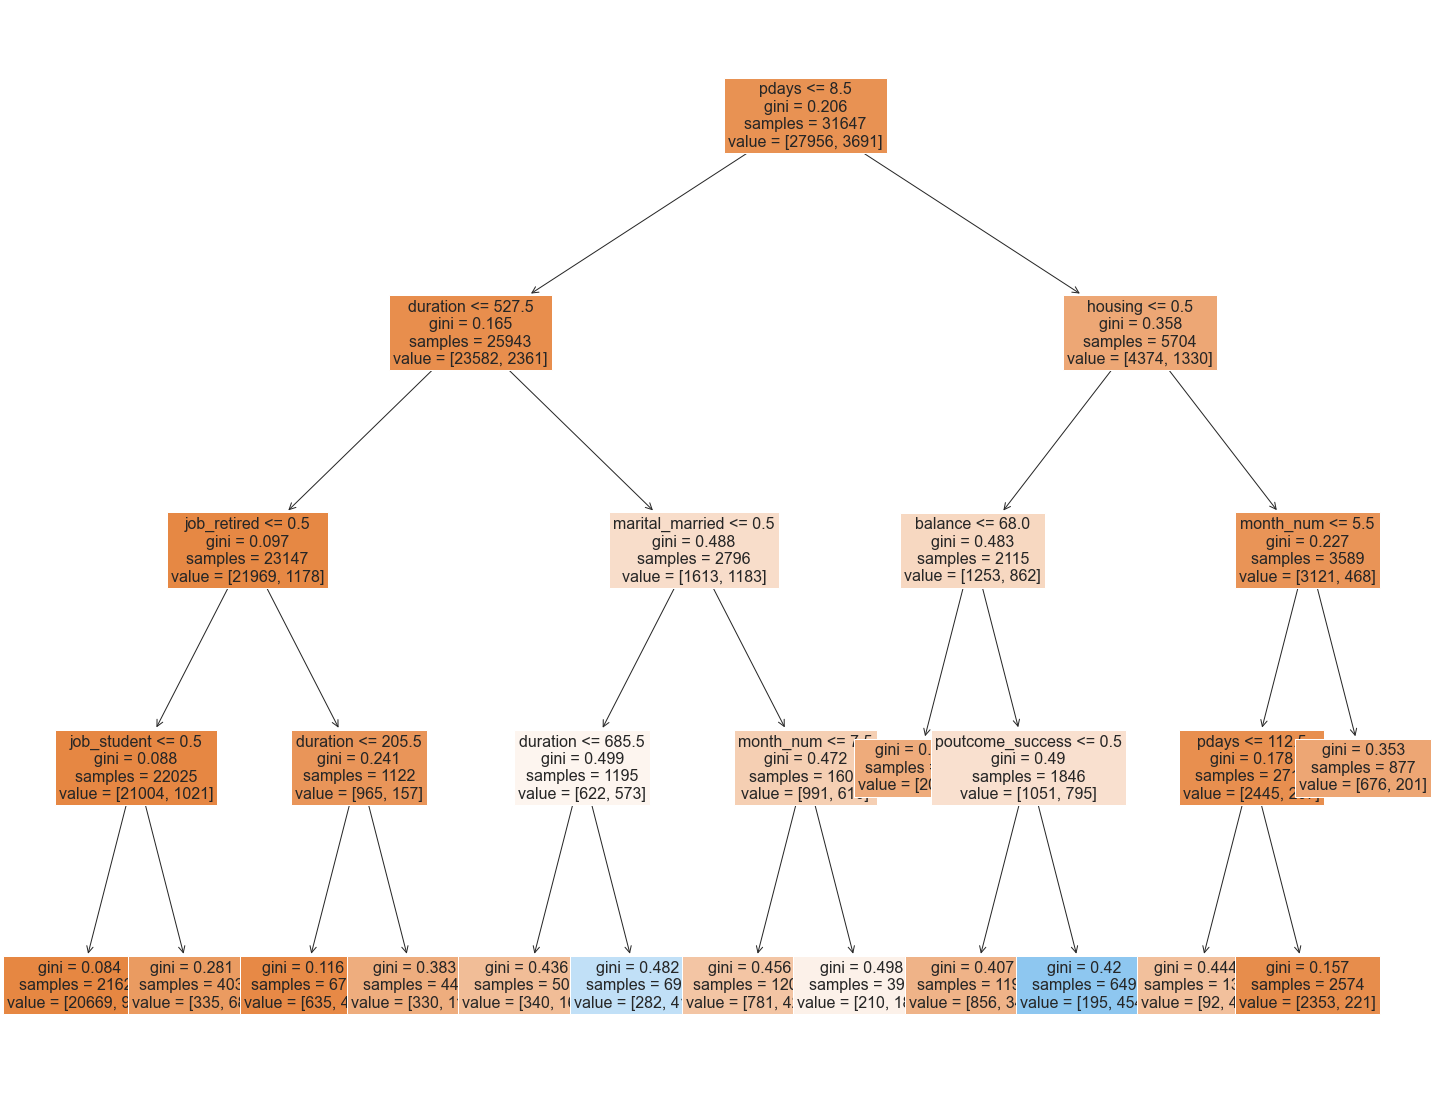

In [168]:
# dibujar el árbol de decisión
plt.figure(figsize=(25,20))  # aumentar el tamaño de la figura en general
plot_tree(clf_r, filled=True, feature_names=X.columns, fontsize=16)
plt.show()

#### Random Forest

En el proceso de entrenamiento de un modelo de Random Forest, se construyen múltiples árboles de decisión utilizando diferentes subconjuntos de los datos y características aleatorias. En la fase de predicción, cada uno de estos árboles de decisión emite una predicción y la predicción final se calcula tomando la media (en el caso de regresión) o la moda (en el caso de clasificación) de las predicciones de todos los árboles.

La principal ventaja de Random Forest es que puede manejar una gran cantidad de características y datos ruidosos sin sobreajustarse. También es capaz de manejar problemas de clasificación y regresión complejos y no lineales

In [189]:
rf = RandomForestClassifier(random_state = 42)

random_grid = {'n_estimators': [5, 10, 20, 100],
              'max_features': [10, 15, 20],
              'max_depth': [3,5,10],
              'min_samples_split': [1000,2000],
              'criterion':['entropy', 'gini']}

rf_random = RandomizedSearchCV(estimator = rf,
param_distributions = random_grid, scoring='recall', n_iter = 50, cv = 3, random_state=42, n_jobs = -1)

rf_random.fit(X_train,y_train)
#Score y parametros
print('sin balancear')
print(rf_random.best_score_)
print(rf_random.best_params_)

rf_random.fit(X_sm,y_sm)
#Score y parametros
print('balanceado')
print(rf_random.best_score_)
print(rf_random.best_params_)

sin balancear
0.3616915324311651
{'n_estimators': 5, 'min_samples_split': 1000, 'max_features': 20, 'max_depth': 5, 'criterion': 'entropy'}
balanceado
0.9003441284277498
{'n_estimators': 10, 'min_samples_split': 2000, 'max_features': 20, 'max_depth': 5, 'criterion': 'entropy'}


In [184]:
#Cogemos los parametros que mejor funcionan
clf= RandomForestClassifier(n_estimators=5, min_samples_split=1000, max_features=20, max_depth=5, criterion='entropy', random_state=42)

#Entrenar
clf.fit(X_train, y_train)

#Predecir en test
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]

print("\nVerdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round(f1_score(y_test, y_pred)* 100,2), '%')


Verdaderos positivos: 559
Falsos positivos: 367
Verdaderos negativos: 11599
Falsos negativos: 1039

Accuracy del modelo: 89.63 %
Precisión del modelo es: 60.37 %
Recall del modelo es: 34.98 %
F1 del modelo es: 44.29 %


In [244]:
#Mejor Modelo
clf_rf = RandomForestClassifier(n_estimators=10, min_samples_split=2000, max_features=20, max_depth=5, criterion='entropy', random_state=42)

#Entrenar
clf_rf.fit(X_sm, y_sm)

#Predecir
y_pred = clf_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
C_MX = confusion_matrix(y_test, y_pred)

# obtener los valores de TP, FP, TN y FN
TP_rf = C_MX[1, 1]
FP_rf = C_MX[0, 1]
TN_rf = C_MX[0, 0]
FN_rf = C_MX[1, 0]

precision_rf=round( TP_rf / (TP_rf + FP_rf)* 100,2)
recall_rf=round(TP_rf/(TP_rf+FN_rf)* 100,2)
F1_rf=round(f1_score(y_test, y_pred)*100,2)

print("\nVerdaderos positivos:", TP_rf)
print("Falsos positivos:", FP_rf)
print("Verdaderos negativos:", TN_rf)
print("Falsos negativos:", FN_rf)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Precisión del modelo es:', precision_rf, '%')
print('Recall del modelo es:', recall_rf, '%')
print('F1 del modelo es:',F1_rf, '%')

#Incluimos los datos para poder pintar las curvas de evaluacion de estos "mejores" modelos
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred)
rf_auc = auc(rf_fpr, rf_tpr)


Verdaderos positivos: 1196
Falsos positivos: 1858
Verdaderos negativos: 10108
Falsos negativos: 402

Accuracy del modelo: 83.34 %
Precisión del modelo es: 39.16 %
Recall del modelo es: 74.84 %
F1 del modelo es: 51.42 %


In [194]:
importances = clf_rf.feature_importances_

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# ordenar las características por importancia en orden descendente
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
top10_features=feature_importances[:10]

# imprimir la importancia de cada una de las 10 características principales en el random forest en orden descendente
for feature, importance in top10_features:
    print("{}: {}".format(feature, importance))

duration: 0.44
housing: 0.2
poutcome_success: 0.16
entre 36 y 55 años: 0.09
marital_married: 0.07
loan: 0.01
poutcome_unknown: 0.01
marital_single: 0.01
education: 0.0
default: 0.0


Una variable (duracion de la llamada en la campaña previa) se lleva la mayor parte del peso en importancia a la hora de predecir, seguida de si tiene hipoteca y del exito de dicha camapaña

#### SVM

La idea principal de las SVM es encontrar un hiperplano que pueda separar los datos de diferentes clases de manera óptima en un espacio de alta dimensión. En el caso de una clasificación binaria, el hiperplano separa los datos en dos clases diferentes, mientras que en el caso de una clasificación multiclase, se pueden utilizar varios hiperplanos.
La eficacia de una SVM depende en gran medida de la elección del kernel, que es una función que se utiliza para transformar los datos a un espacio de alta dimensión

Cogemos un muestra de 4K resgitros porque SVM es un modelo de alta complejidad computacional y su necesidad de optimizar una función de costo para encontrar la solución óptima. Además, partimos de las características estandarizadas ya que SVM funciona mejor de esta forma

In [198]:
df_sample_4K = df_encoded.sample(n=4000, random_state=42)
y_4K=df_sample_4K['subscribed']
X_4K=df_sample_4K.drop('subscribed', axis=1)

Estandarizamos porque es un modelo que usa distancias

In [199]:
X_4K_n = StandardScaler().fit_transform(X_4K)

In [202]:
X_train_4K , X_test_4K, y_train_4K, y_test_4K = train_test_split(X_4K_n, y_4K, test_size=0.3, random_state=42)

Los principales parámetros de SVM son los siguientes:
- kernel: SVM puede utilizar diferentes tipos de kernel para transformar los datos de entrada en un espacio de características de mayor dimensión donde es más fácil encontrar el hiperplano de separación. Algunos de los kernels más comunes son el kernel lineal, el kernel polinómico y el kernel radial basis function (RBF)

- C: controla la complejidad, un valor alto de C da como resultado un modelo más riguroso que penaliza más los errores de clasificación.

- gamma: controla el radio de influencia de un solo vector de soporte. Si gamma es muy alto, la frontera de decisión puede ser demasiado irregular, y si gamma es muy bajo, la frontera de decisión puede ser demasiado suave


In [204]:
grid = GridSearchCV(
       estimator=SVC(kernel='rbf'),
       param_grid={
           'C': [0.1, 1, 100,1000],
           'gamma': [0.0001, 0.1, 1, 5]#valores grandes estropean la funcion del kernel
       },
       cv=5, scoring='recall', n_jobs=-1)
grid.fit(X_train_4K,y_train_4K)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [0.0001, 0.1, 1, 5]},
             scoring='recall')

In [205]:
print("Mejor parametro: ", grid.best_params_)
print("Score validación cruzada: ", grid.best_score_)

Mejor parametro:  {'C': 100, 'gamma': 0.1}
Score validación cruzada:  0.2507462686567164


In [206]:
# SVM RBF
svm = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])

# Entrenamos
svm.fit(X_train_4K, y_train_4K)

# Predecimos
y_pred = svm.predict(X_test_4K)

accuracy = accuracy_score(y_test_4K, y_pred)
C_MX = confusion_matrix(y_test_4K, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]

print("\nVerdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2), '%')
print('F1 del modelo es:', round(f1_score(y_test_4K, y_pred)* 100,2), '%')


Verdaderos positivos: 52
Falsos positivos: 68
Verdaderos negativos: 976
Falsos negativos: 104

Accuracy del modelo: 85.67 %
Precisión del modelo es: 43.33 %
Recall del modelo es: 33.33
F1 del modelo es: 37.68 %


In [ ]:
#El kernel lineal tarda mucho en ejecutar
#grid_l = GridSearchCV(
 #      estimator=SVC(kernel='linear'),
 #      param_grid={
 #          'C': [0.1,100,1000],
 #          'gamma': [0.0001, 0.1, 5]#valores grandes estropean la funcion del kernel
 #      },
 #      cv=3, scoring='roc_auc', n_jobs=-1)
#grid_l.fit(X_train_4K,y_train_4K)


In [100]:
# SVM LINEAR
svm_ln = SVC(kernel='linear', C=1000, gamma=0.0001)

# Entrenamos
svm_ln.fit(X_train_4K, y_train_4K)

# Predecimos
y_pred = svm_ln.predict(X_test_4K)

accuracy = accuracy_score(y_test_4K, y_pred)
C_MX = confusion_matrix(y_test_4K, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]

print("\nVerdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2))
print('F1 del modelo es:', round(f1_score(y_test, y_pred)* 100,2), '%')


Verdaderos positivos: 28
Falsos positivos: 13
Verdaderos negativos: 1031
Falsos negativos: 128

Accuracy del modelo: 88.25 %
Precisión del modelo es: 68.29 %
Recall del modelo es: 17.95


In [101]:
# SVM LINEAR OTROS PARAMETROS
svm_ln = SVC(kernel='linear', C=100, gamma=0.1)

# Entrenamos
svm_ln.fit(X_train_4K, y_train_4K)

# Predecimos
y_pred = svm_ln.predict(X_test_4K)

accuracy = accuracy_score(y_test_4K, y_pred)
C_MX = confusion_matrix(y_test_4K, y_pred)

# obtener los valores de TP, FP, TN y FN
TP = C_MX[1, 1]
FP = C_MX[0, 1]
TN = C_MX[0, 0]
FN = C_MX[1, 0]

print("\nVerdaderos positivos:", TP)
print("Falsos positivos:", FP)
print("Verdaderos negativos:", TN)
print("Falsos negativos:", FN)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Precisión del modelo es:', round( TP / (TP + FP)* 100,2), '%')
print('Recall del modelo es:', round(TP/(TP+FN)* 100,2))
print('F1 del modelo es:', round(f1_score(y_test, y_pred)* 100,2), '%')


Verdaderos positivos: 28
Falsos positivos: 13
Verdaderos negativos: 1031
Falsos negativos: 128

Accuracy del modelo: 88.25 %
Precisión del modelo es: 68.29 %
Recall del modelo es: 17.95


**Datos balanceados: aumentando clase minoritaria**

In [209]:
sm = SMOTE(random_state=42)
X_4K_sm, y_4K_sm= sm.fit_resample(X_4K_n, y_4K)

In [242]:
# SVM SMOTE
clf_svm = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'], random_state=42)

# Entrenamos
clf_svm.fit(X_4K_sm, y_4K_sm)

# Predecimos
y_pred = clf_svm.predict(X_test_4K)

accuracy = accuracy_score(y_test_4K, y_pred)
C_MX = confusion_matrix(y_test_4K, y_pred)

# obtener los valores de TP, FP, TN y FN
TP_svm = C_MX[1, 1]
FP_svm = C_MX[0, 1]
TN_svm = C_MX[0, 0]
FN_svm = C_MX[1, 0]

precision_svm=round( TP_svm / (TP_svm + FP_svm)* 100,2)
recall_svm=round(TP_svm/(TP_svm+FN_svm)* 100,2)
F1_svm=round(f1_score(y_test_4K, y_pred)*100,2)

print("\nVerdaderos positivos:", TP_svm)
print("Falsos positivos:", FP_svm)
print("Verdaderos negativos:", TN_svm)
print("Falsos negativos:", FN_svm)

print("\nAccuracy del modelo:", round(accuracy * 100,2), '%')
print('Precisión del modelo es:', precision_svm, '%')
print('Recall del modelo es:', recall_svm, '%')
print('F1 del modelo es:',F1_svm, '%')

#Incluimos los datos para poder pintar las curvas de evaluacion de estos "mejores" modelos
svm_precision, svm_recall, _ = precision_recall_curve(y_test_4K, y_pred)
svm_fpr, svm_tpr, _ = roc_curve(y_test_4K, y_pred)
svm_auc = auc(svm_fpr, svm_tpr)


Verdaderos positivos: 154
Falsos positivos: 15
Verdaderos negativos: 1029
Falsos negativos: 2

Accuracy del modelo: 98.58 %
Precisión del modelo es: 91.12 %
Recall del modelo es: 98.72 %
F1 del modelo es: 94.77 %


Es el mejor modelo este último, como en el resto de modelos al estar desbalanceado funciona mejor cuando se entrena el modelo con datos balanceados generados sintéticamente.

## EVALUACION DE LOS MODELOS

Tabla comparativa de los valores de evaluación en cada uno de los modelos entrenados:

In [223]:
datos_evaluacion = [
    {"Modelo": "RL", "Precision": precision_rl, "Recall":recall_rl, "F1":F1_rl},
    {"Modelo": "KNN", "Precision": precision_knn, "Recall":recall_knn, "F1":F1_knn},
    {"Modelo": "ARBOL", "Precision": precision_ar, "Recall":recall_ar, "F1":F1_ar},
    {"Modelo": "RF", "Precision": precision_rf, "Recall":recall_rf, "F1":F1_rf},
    {"Modelo": "SVM", "Precision": precision_svm, "Recall":recall_svm, "F1":F1_svm}
]

# Crear un DataFrame a partir de la lista de diccionarios
df_evaluation = pd.DataFrame(datos_evaluacion)

df_evaluation

,Modelo,Precision,Recall,F1
0,RL,38.48,71.71,50.22
1,KNN,36.16,60.14,45.16
2,ARBOL,64.86,24.72,35.80
3,RF,39.16,74.84,51.42
4,SVM,91.12,98.72,94.77


### CURVA DE ROC

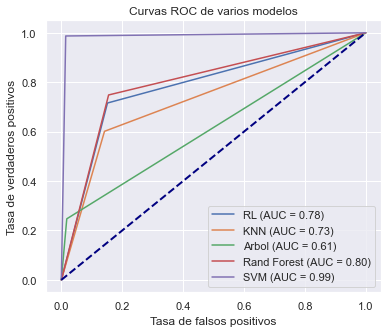

In [235]:
# graficar las curvas ROC de cada modelo en la misma figura
plt.plot(lr_fpr, lr_tpr, label='Reg Log (AUC = %0.2f)' % lr_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.2f)' % knn_auc)
plt.plot(ar_fpr, ar_tpr, label='Arbol (AUC = %0.2f)' % ar_auc)
plt.plot(rf_fpr, rf_tpr, label='Rand Forest (AUC = %0.2f)' % rf_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Añadir la línea diagonal

# agregar título y etiquetas de los ejes
plt.title('Curvas ROC')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')

# agregar leyenda al gráfico
plt.legend(loc="lower right")

# mostrar el gráfico
plt.show()

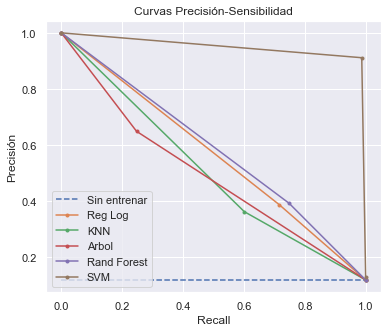

In [251]:
# Pintamos la curva de precision-sensibilidad curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
plt.plot(lr_recall, lr_precision, marker='.', label='Reg Log')
plt.plot(knn_recall, knn_precision, marker='.', label='KNN')
plt.plot(ar_recall, ar_precision, marker='.', label='Arbol')
plt.plot(rf_recall, rf_precision, marker='.', label='Rand Forest')
plt.plot(svm_recall, svm_precision, marker='.', label='SVM')
#Etiquetas de ejes
plt.title('Curvas Precisión-Sensibilidad')
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.legend(loc="lower left")